In [79]:
pip install pandas==2.2.2

Note: you may need to restart the kernel to use updated packages.


In [80]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
color = sns.color_palette()
import plotly.offline as py
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.offline as offline
offline.init_notebook_mode()

import cufflinks as cf
cf.go_offline()
plt.style.use('fivethirtyeight')


In [81]:
app_train=pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')


In [82]:
app_train.head() 


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [83]:

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [84]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


Missing Values  % of Total Values
COMMONAREA_MEDI                   214865               69.9
COMMONAREA_AVG                    214865               69.9
COMMONAREA_MODE                   214865               69.9
NONLIVINGAPARTMENTS_MEDI          213514               69.4
NONLIVINGAPARTMENTS_MODE          213514               69.4
NONLIVINGAPARTMENTS_AVG           213514               69.4
FONDKAPREMONT_MODE                210295               68.4
LIVINGAPARTMENTS_MODE             210199               68.4
LIVINGAPARTMENTS_MEDI             210199               68.4
LIVINGAPARTMENTS_AVG              210199               68.4
FLOORSMIN_MODE                    208642               67.8
FLOORSMIN_MEDI                    208642               67.8
FLOORSMIN_AVG                     208642               67.8
YEARS_BUILD_MODE                  204488               66.5
YEARS_BUILD_MEDI                  204488               66.5
YEARS_BUILD_AVG                   204488               66.5
OWN_CAR_AGE                       202929               66.0
LANDAREA_AVG                      182590               59.4
LANDAREA_MEDI                     182590               59.4
LANDAREA_MODE                     182590               59.4

In [85]:
(app_train['DAYS_BIRTH'] / -365).describe()


count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [86]:
(app_train['DAYS_EMPLOYED']/-365).describe()


count    307511.000000
mean       -174.835742
std         387.056895
min       -1000.665753
25%           0.791781
50%           3.323288
75%           7.561644
max          49.073973
Name: DAYS_EMPLOYED, dtype: float64

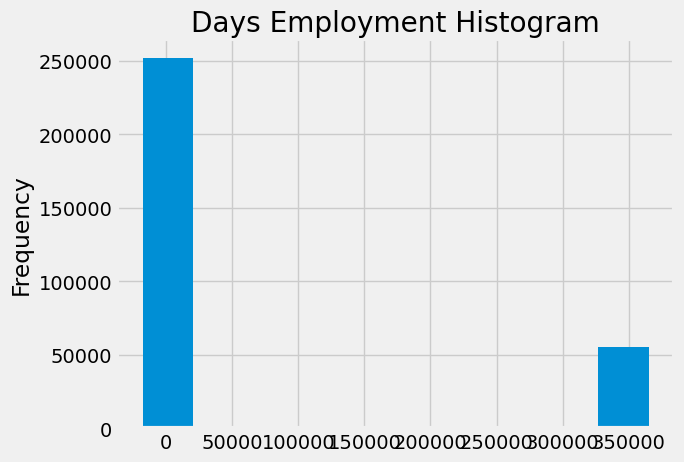

In [87]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');


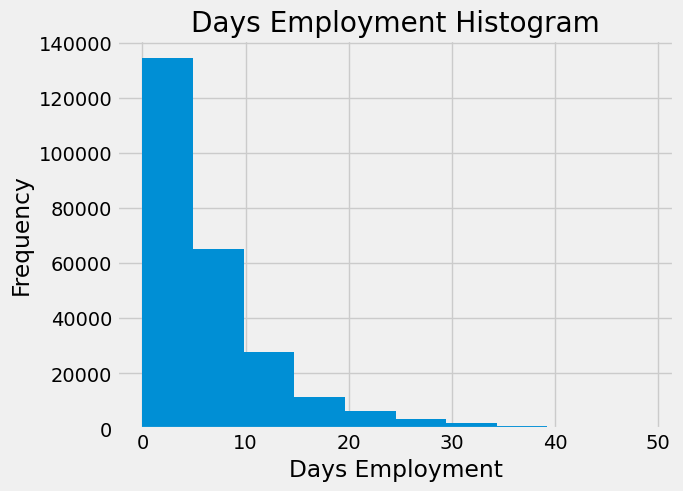

In [88]:
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
(app_train['DAYS_EMPLOYED']/-365).plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [89]:

def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();
    
def plot_distribution(var):
    
    i = 0
    t1 = app_train.loc[app_train['TARGET'] != 0]
    t0 = app_train.loc[app_train['TARGET'] == 0]

    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,2,figsize=(12,12))

    for feature in var:
        i += 1
        plt.subplot(2,2,i)
        sns.kdeplot(t1[feature], bw=0.5,label="TARGET = 1")
        sns.kdeplot(t0[feature], bw=0.5,label="TARGET = 0")
        plt.ylabel('Density plot', fontsize=12)
        plt.xlabel(feature, fontsize=12)
        locs, labels = plt.xticks()
        plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show();

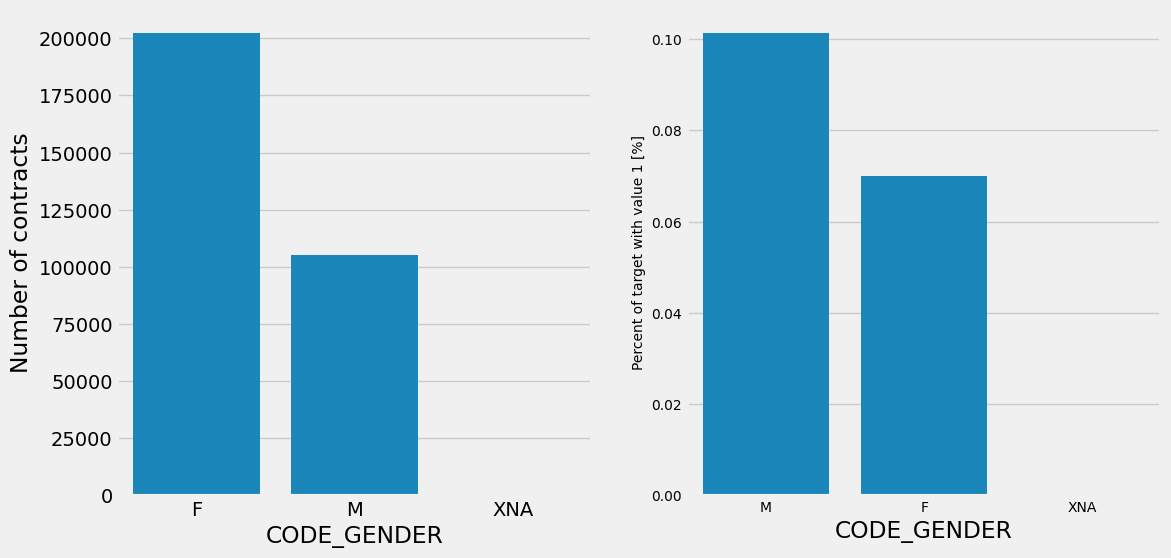

In [90]:
plot_stats('CODE_GENDER')

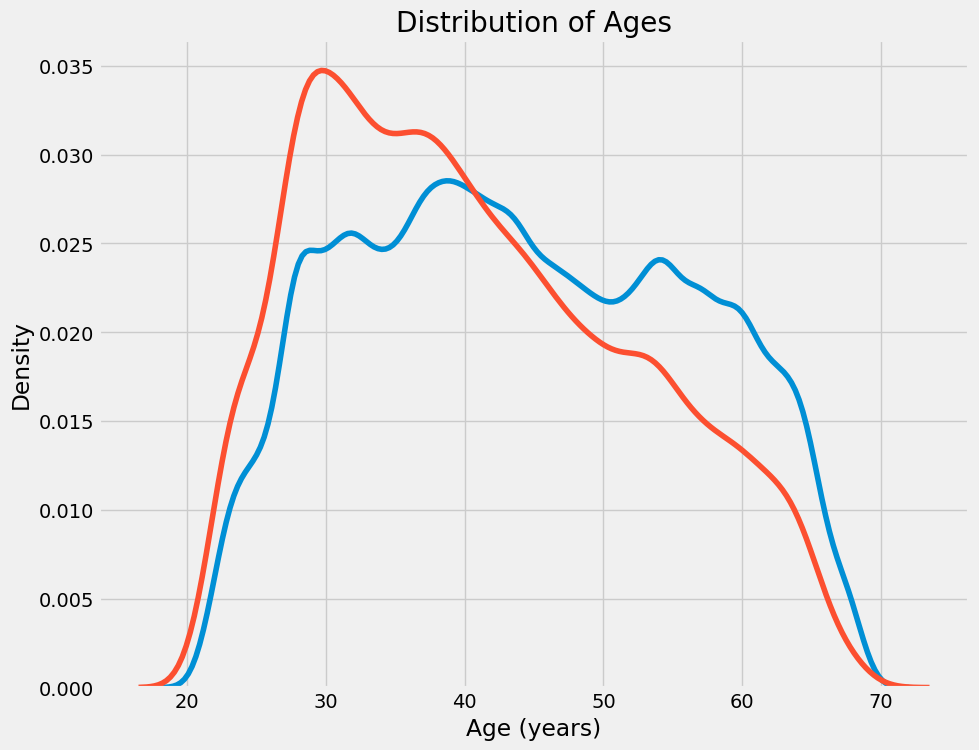

In [91]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/1085579307.py:6: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



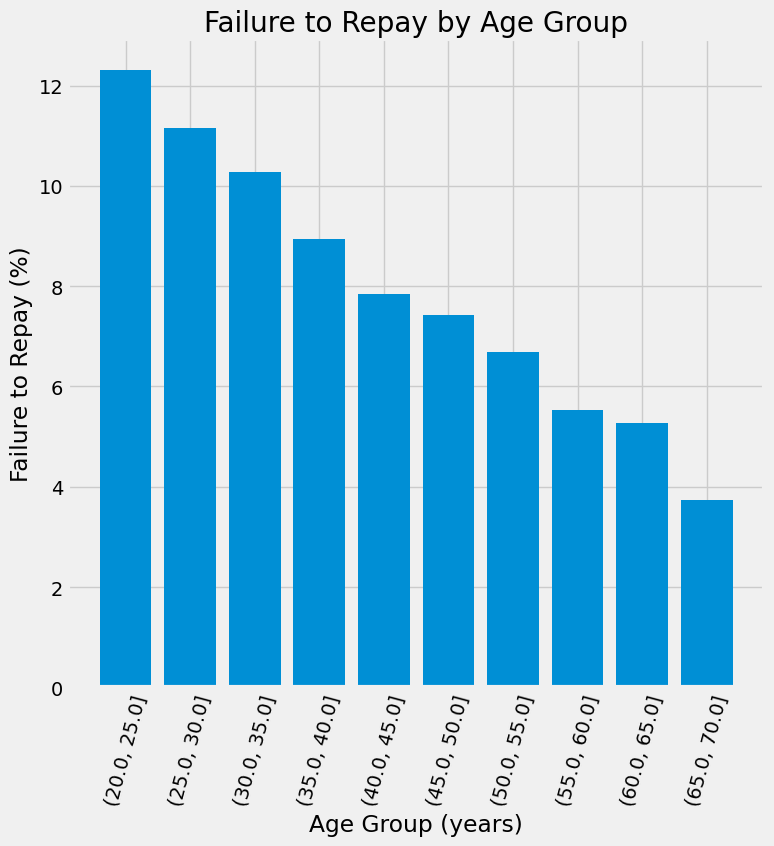

In [92]:
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / -365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_groups  = age_data.groupby('YEARS_BINNED').mean()
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

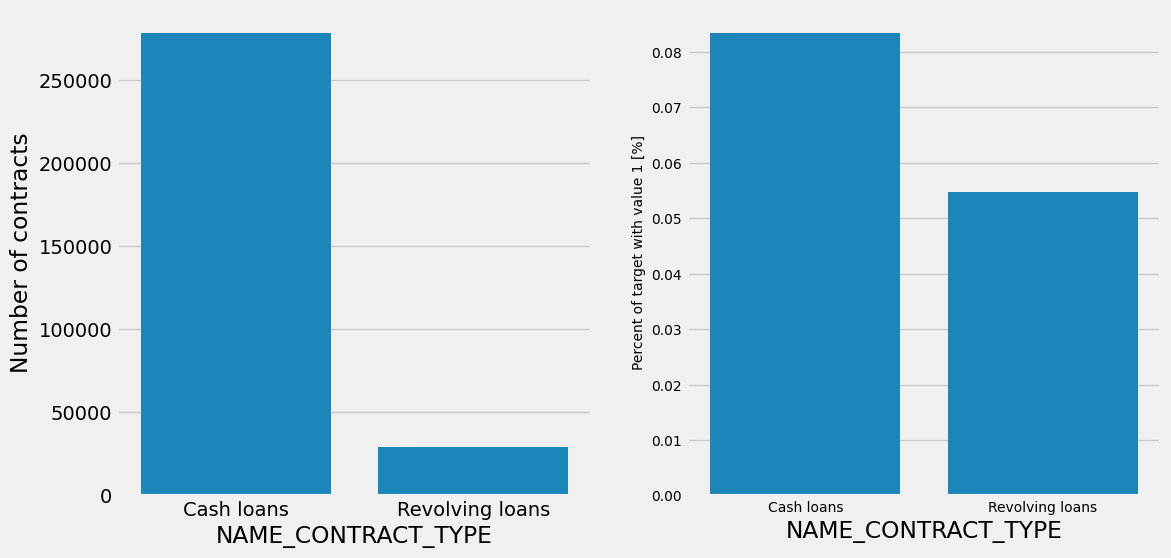

In [93]:
plot_stats('NAME_CONTRACT_TYPE')


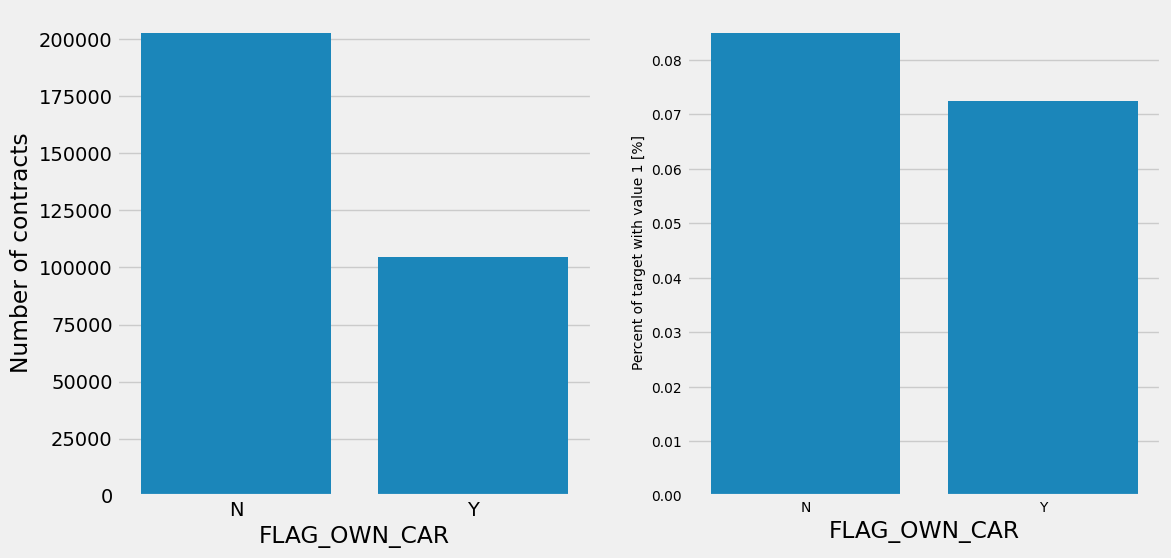

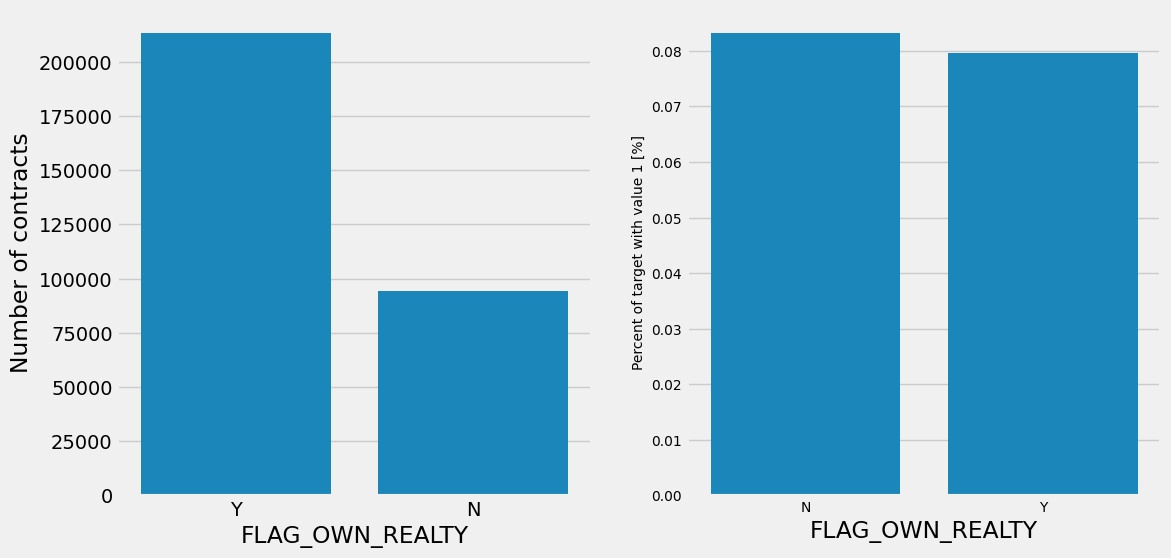

In [94]:
plot_stats('FLAG_OWN_CAR')
plot_stats('FLAG_OWN_REALTY')

/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/575290407.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/575290407.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



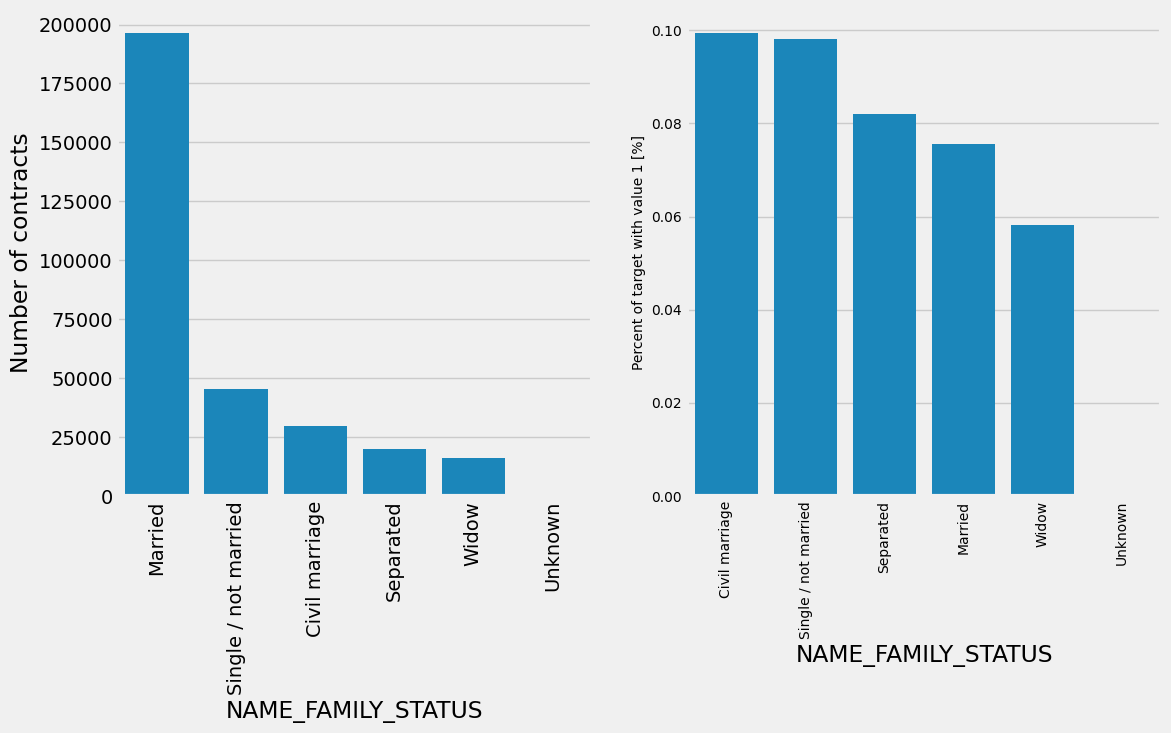

In [95]:
plot_stats('NAME_FAMILY_STATUS',True, True)


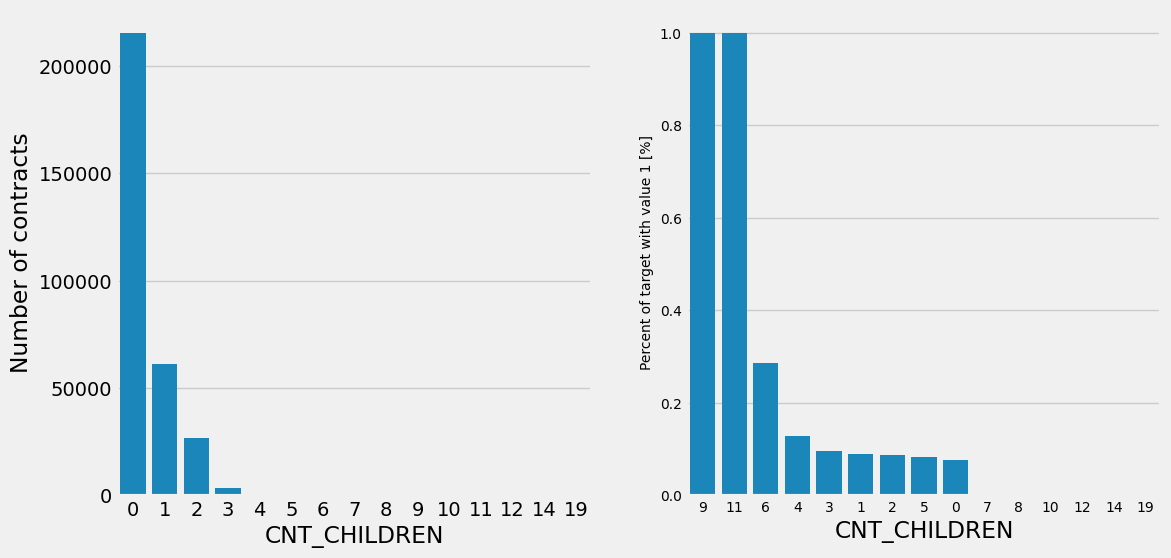

In [96]:
plot_stats('CNT_CHILDREN')


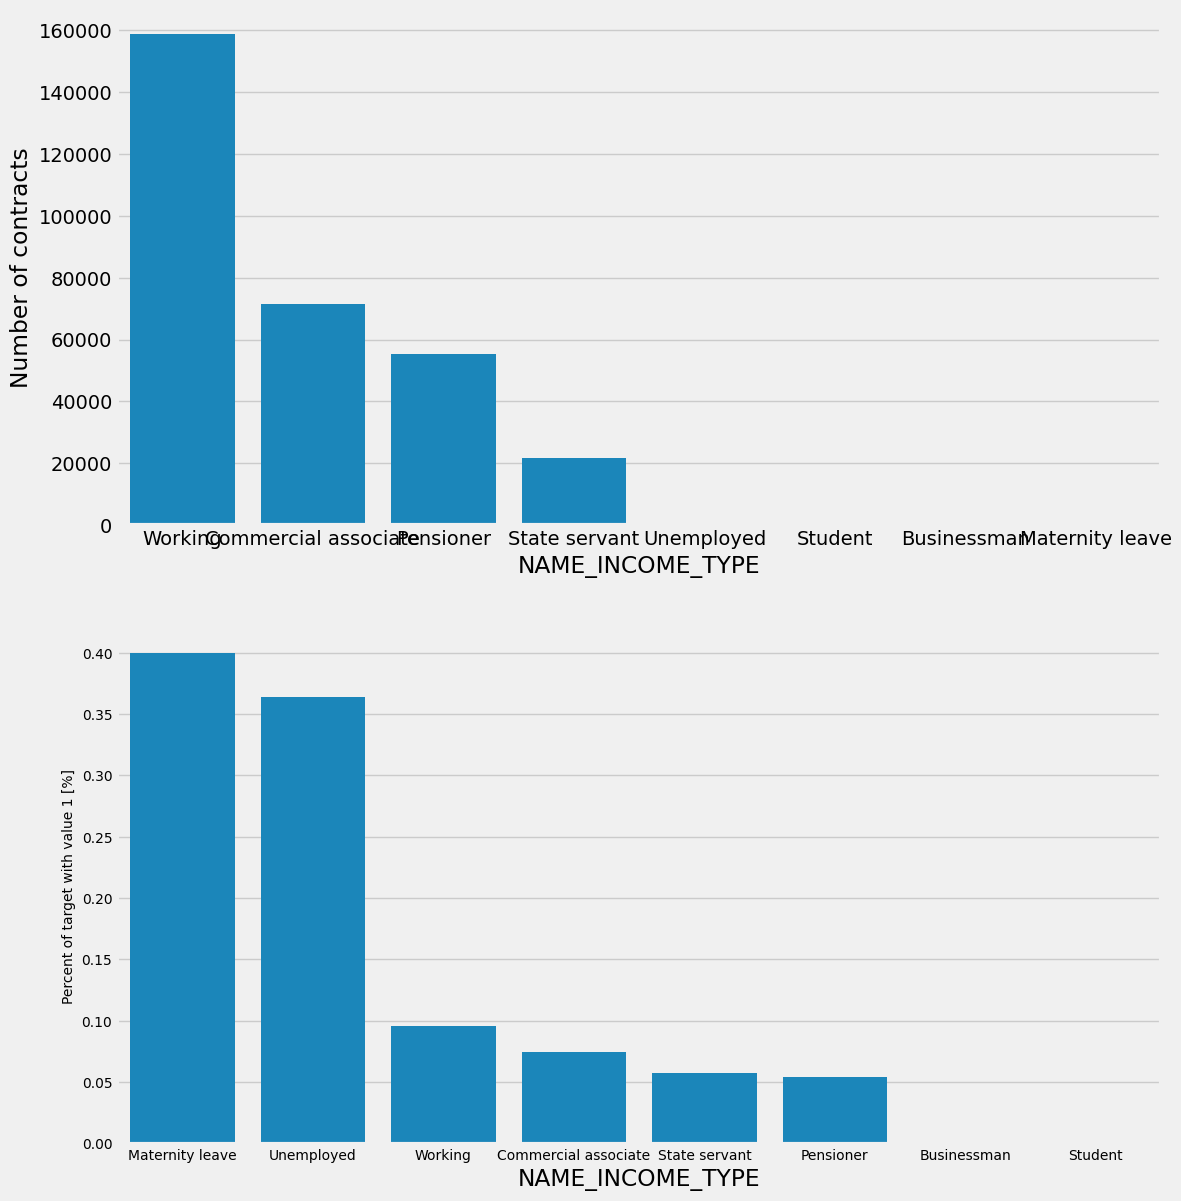

In [97]:
plot_stats('NAME_INCOME_TYPE',False,False)


/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/575290407.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/575290407.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



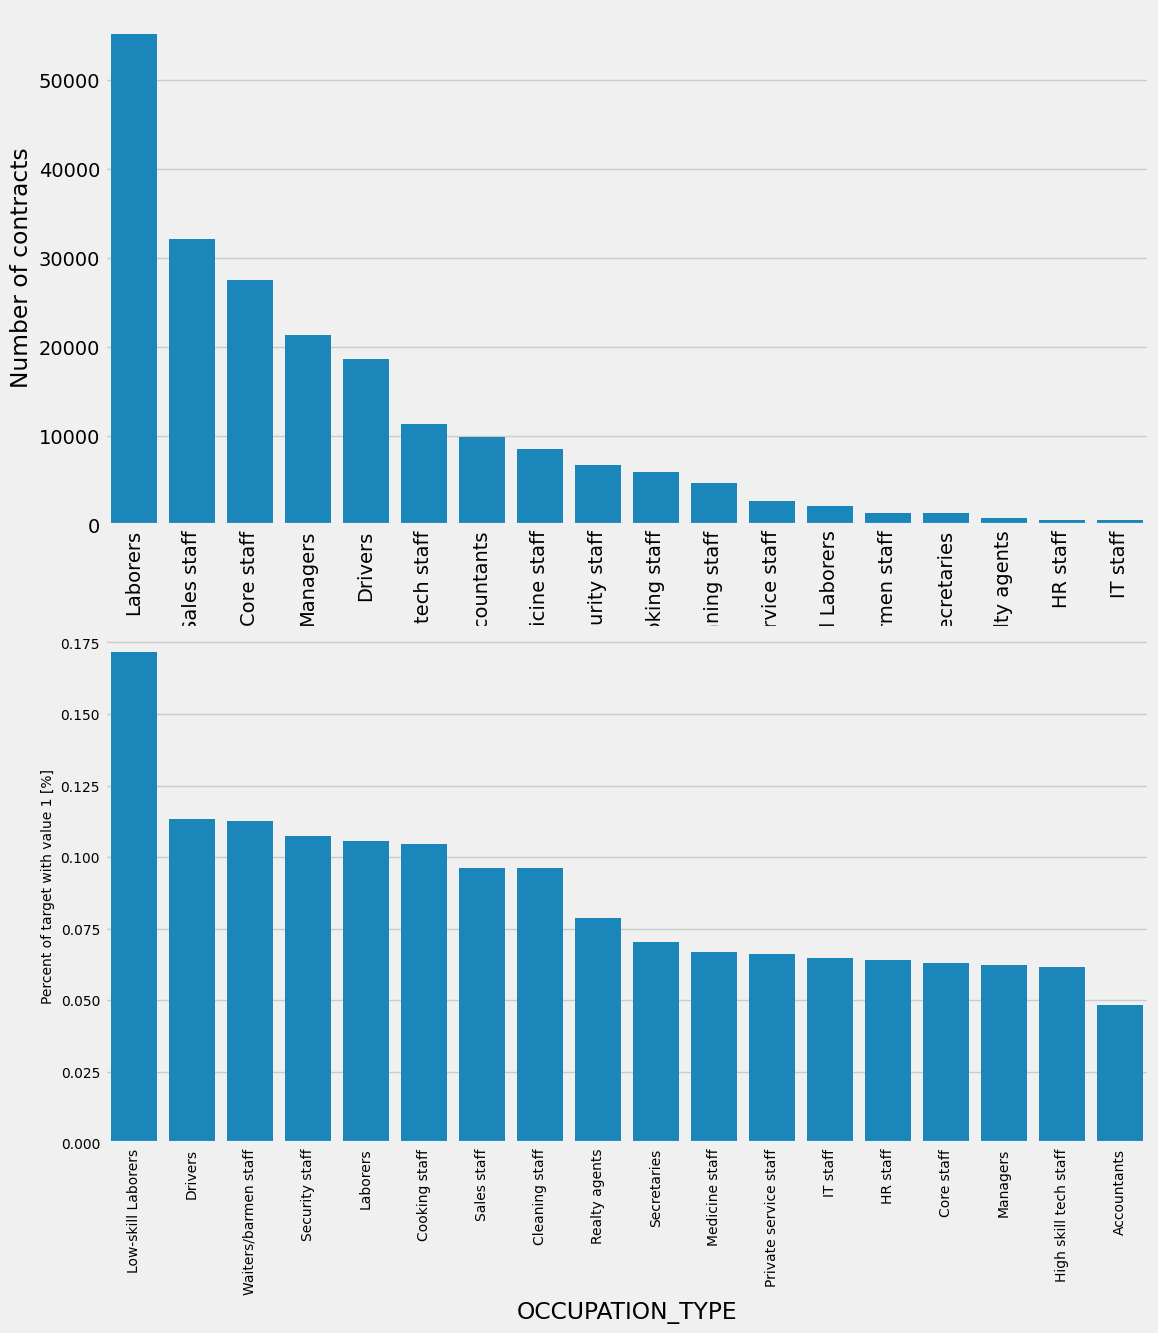

In [98]:
plot_stats('OCCUPATION_TYPE',True, False)


/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/575290407.py:17: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/575290407.py:21: UserWarning:

FixedFormatter should only be used together with FixedLocator



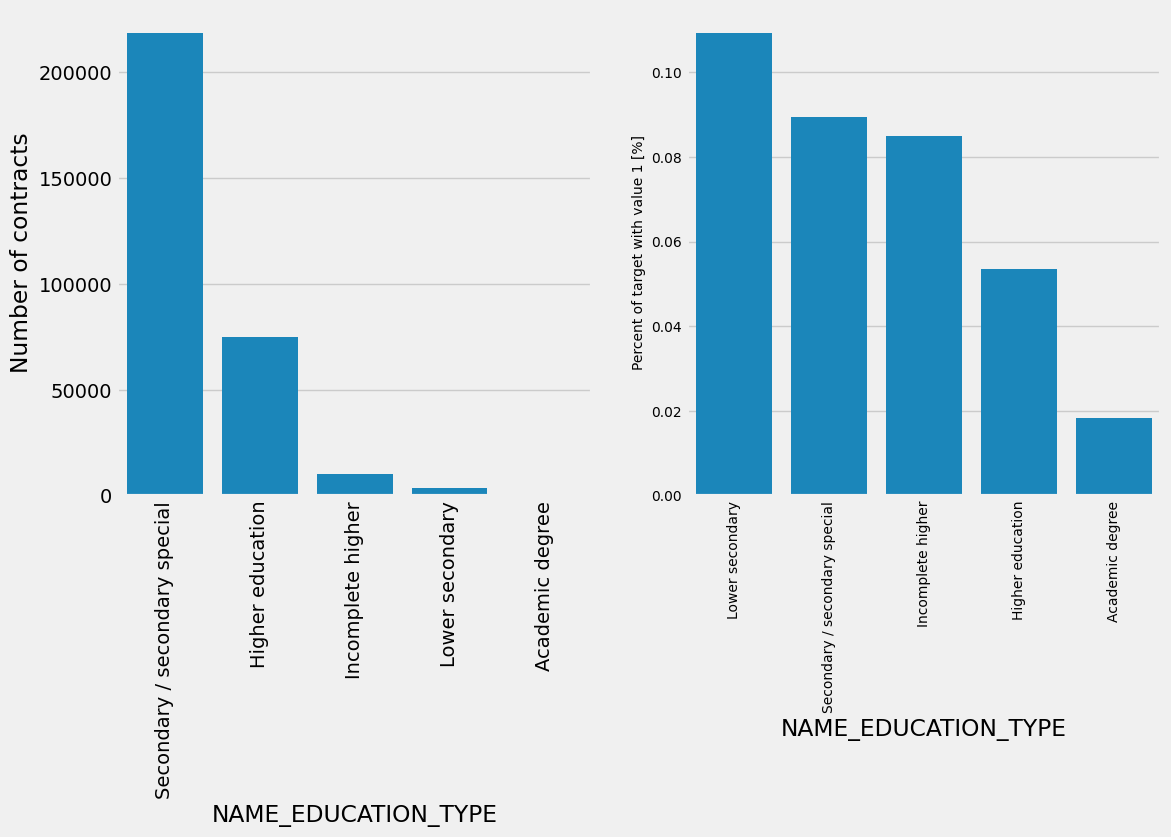

In [99]:
plot_stats('NAME_EDUCATION_TYPE',True)


In [100]:
app_train_domain = app_train.copy()
app_test_domain = app_test.copy()

app_train_domain['CREDIT_INCOME_PERCENT'] = app_train_domain['AMT_CREDIT'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['ANNUITY_INCOME_PERCENT'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_INCOME_TOTAL']
app_train_domain['CREDIT_TERM'] = app_train_domain['AMT_ANNUITY'] / app_train_domain['AMT_CREDIT']
app_train_domain['DAYS_EMPLOYED_PERCENT'] = app_train_domain['DAYS_EMPLOYED'] / app_train_domain['DAYS_BIRTH']
app_train_domain['INCOME_PER_CHILD'] = app_train_domain['AMT_INCOME_TOTAL'] / app_train_domain['CNT_CHILDREN']
app_train_domain['HAS_HOUSE_INFORMATION'] = app_train_domain['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)




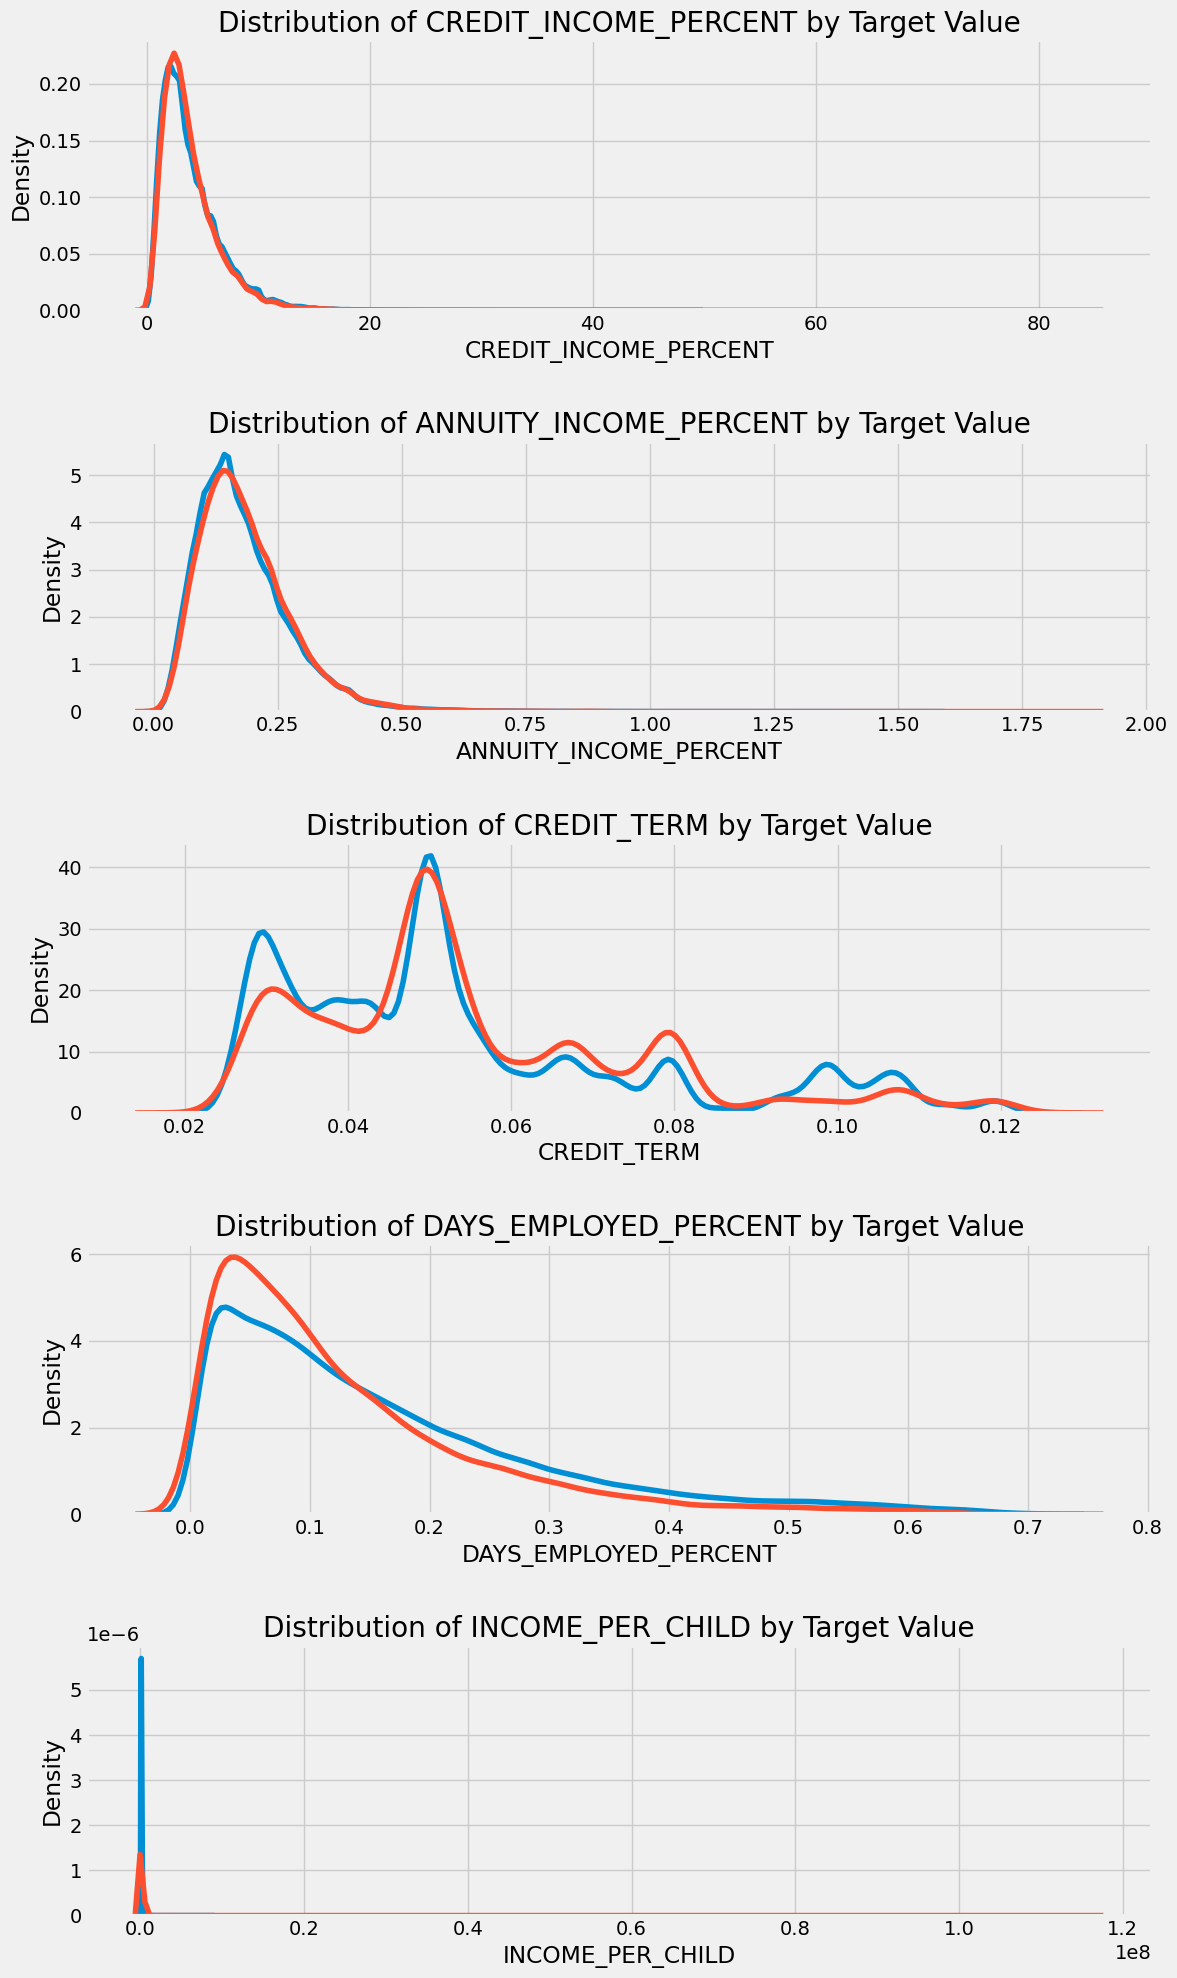

In [101]:
plt.figure(figsize = (12, 20))
# iterate through the new features
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT','INCOME_PER_CHILD']):
    
    # create a new subplot for each source
    plt.subplot(5, 1, i + 1)
    # plot repaid loans
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot loans that were not repaid
    sns.kdeplot(app_train_domain.loc[app_train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [102]:
def plot_stats(feature,label_rotation=False,horizontal_layout=True):
    temp = app_train_domain[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = app_train_domain[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)
    
    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(12,14))
    sns.set_color_codes("pastel")
    s = sns.barplot(ax=ax1, x = feature, y="Number of contracts",data=df1)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    
    s = sns.barplot(ax=ax2, x = feature, y='TARGET', order=cat_perc[feature], data=cat_perc)
    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of target with value 1 [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)

    plt.show();

/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/1002043548.py:16: UserWarning:

FixedFormatter should only be used together with FixedLocator

/var/folders/fx/sq5y2kbj2gb9cx5kskp8kpsr0000gn/T/ipykernel_991/1002043548.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator



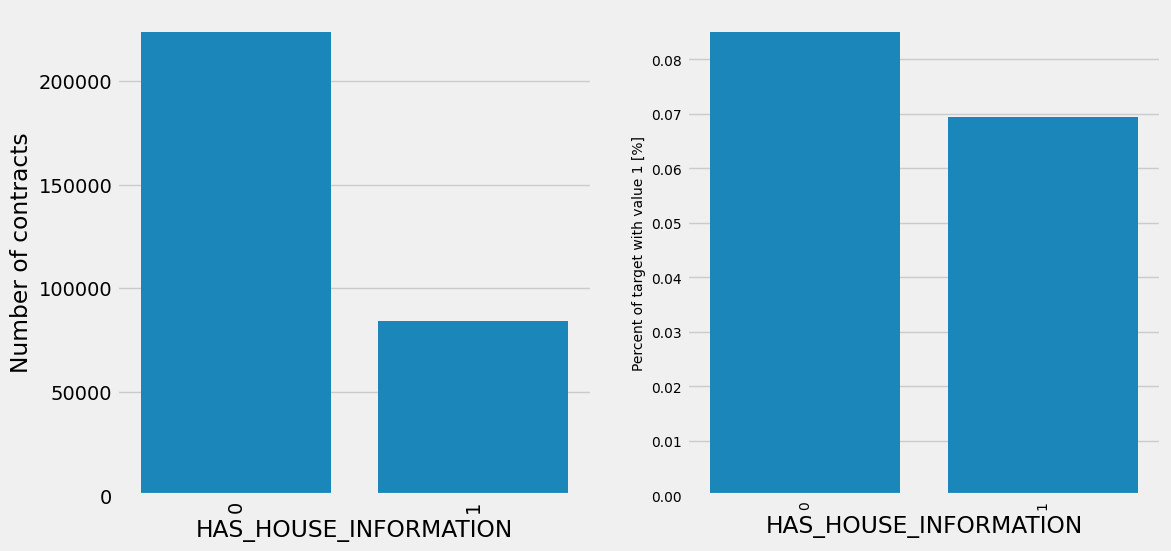

In [103]:
plot_stats('HAS_HOUSE_INFORMATION',True)


In [104]:
app_test_domain['CREDIT_INCOME_PERCENT'] = app_test_domain['AMT_CREDIT'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['ANNUITY_INCOME_PERCENT'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_INCOME_TOTAL']
app_test_domain['CREDIT_TERM'] = app_test_domain['AMT_ANNUITY'] / app_test_domain['AMT_CREDIT']
app_test_domain['DAYS_EMPLOYED_PERCENT'] = app_test_domain['DAYS_EMPLOYED'] / app_test_domain['DAYS_BIRTH']
app_test_domain['INCOME_PER_CHILD'] = app_test_domain['AMT_INCOME_TOTAL'] / app_test_domain['CNT_CHILDREN']
app_test_domain['HAS_HOUSE_INFORMATION'] = app_test_domain['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)



### TabNetClassifier

In [105]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from pytorch_tabnet.tab_model import TabNetClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [106]:
def model(app_train_domain, test_features, encoding='ohe'):
    # Replace infinite values with NaN and then handle them
    app_train_domain.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Separating features and target
    X = app_train_domain.drop(columns=['SK_ID_CURR', 'TARGET'])
    y = app_train_domain['TARGET']
    
    # Splitting the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Identify categorical and numeric features
    categorical_features = X.select_dtypes(include=['object']).columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Preprocessing Pipeline for categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    # Preprocessing Pipeline for numeric features (imputation and scaling)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    
    # Combine preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    # Apply preprocessing to the data
    X_train = preprocessor.fit_transform(X_train)
    X_val = preprocessor.transform(X_val)
    
    # Convert the processed data back to DataFrame with appropriate column names
    ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    feature_names = numeric_features.tolist() + ohe_feature_names.tolist()
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_val = pd.DataFrame(X_val, columns=feature_names)

    print('Training Data Shape: ', X_train.shape)
    print('Validation Data Shape: ', X_val.shape)

    # Define the model with parameters
    clf_best = TabNetClassifier(
        n_d=8,
        n_a=8,
        n_steps=7,
        gamma=1.0,
        lambda_sparse=0.01
    )

    # Train the model with early stopping
    clf_best.fit(
        X_train=X_train.values, y_train=y_train.values,
        eval_set=[(X_train.values, y_train.values), (X_val.values, y_val.values)],
        eval_name=['train', 'valid'],
        eval_metric=['auc'],
        max_epochs=10,
        patience=5,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    
    # Make predictions
    y_pred_train_prob = clf_best.predict_proba(X_train.values)[:, 1]
    y_pred_prob = clf_best.predict_proba(X_val.values)[:, 1]
    
    # Calculate AUC
    train_auc = roc_auc_score(y_train, y_pred_train_prob)
    val_auc = roc_auc_score(y_val, y_pred_prob)
    print(f'Train AUC: {train_auc:.4f}')
    print(f'Validation AUC: {val_auc:.4f}')

    # Get feature importances
    feature_importances = pd.DataFrame({
        'feature': feature_names,
        'importance': clf_best.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    return clf_best, feature_importances, train_auc, val_auc, X_train, y_train, X_val, y_val



Training Data Shape:  (246008, 256)
Validation Data Shape:  (61503, 256)


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.29594 | train_auc: 0.67683 | valid_auc: 0.67424 |  0:00:51s
epoch 1  | loss: 0.26958 | train_auc: 0.68257 | valid_auc: 0.68151 |  0:01:42s
epoch 2  | loss: 0.26631 | train_auc: 0.69878 | valid_auc: 0.69715 |  0:02:34s
epoch 3  | loss: 0.26427 | train_auc: 0.69365 | valid_auc: 0.6924  |  0:03:29s
epoch 4  | loss: 0.26474 | train_auc: 0.69736 | valid_auc: 0.69887 |  0:04:21s
epoch 5  | loss: 0.26412 | train_auc: 0.69644 | valid_auc: 0.6941  |  0:05:16s
epoch 6  | loss: 0.26402 | train_auc: 0.7017  | valid_auc: 0.69865 |  0:06:08s
epoch 7  | loss: 0.26425 | train_auc: 0.6906  | valid_auc: 0.6871  |  0:07:00s
epoch 8  | loss: 0.26349 | train_auc: 0.69838 | valid_auc: 0.69465 |  0:07:54s
epoch 9  | loss: 0.26258 | train_auc: 0.70056 | valid_auc: 0.69716 |  0:08:46s

Early stopping occurred at epoch 9 with best_epoch = 4 and best_valid_auc = 0.69887


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!



Train AUC: 0.6974
Validation AUC: 0.6989


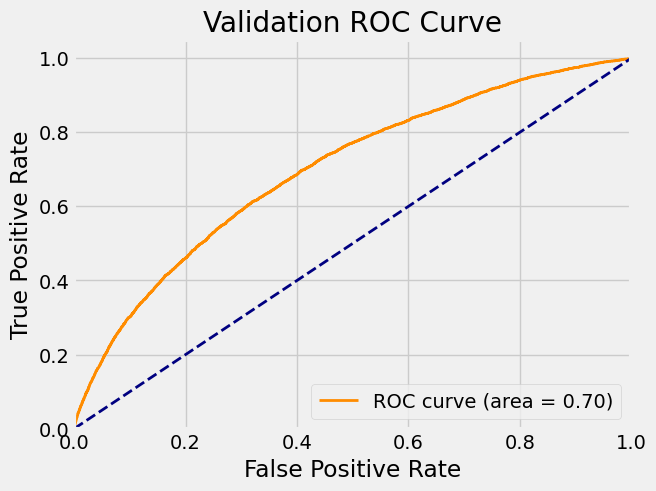

In [107]:
def plot_roc_curve(model, X_val, y_val, title='ROC Curve'):
    y_pred_prob = model.predict_proba(X_val.values)[:, 1]
    fpr, tpr, _ = roc_curve(y_val, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()


clf_best, feature_importances, train_auc, val_auc, X_train, y_train, X_val, y_val = model(app_train_domain, app_test_domain)
plot_roc_curve(clf_best, X_val, y_val, title='Validation ROC Curve')


In [108]:
print(feature_importances)

                                 feature  importance
29                          EXT_SOURCE_3    0.243462
7                          DAYS_EMPLOYED    0.154541
28                          EXT_SOURCE_2    0.075366
111   NAME_CONTRACT_TYPE_Revolving loans    0.072445
18                  REGION_RATING_CLIENT    0.044576
..                                   ...         ...
130           NAME_INCOME_TYPE_Pensioner    0.000000
132             NAME_INCOME_TYPE_Student    0.000000
133          NAME_INCOME_TYPE_Unemployed    0.000000
135  NAME_EDUCATION_TYPE_Academic degree    0.000000
255              EMERGENCYSTATE_MODE_nan    0.000000

[256 rows x 2 columns]


#### Random Search

In [110]:
# Define the parameter distribution for randomized search
param_dist = {
    'n_d': [8, 16],
    'n_a': [8, 16],
    'n_steps': [3, 5, 7],
    'gamma': [1.0, 1.5, 2.0],
    'lambda_sparse': [1e-3, 1e-2],
    'max_epochs': [5, 10, 20]
}

# Custom function to include epochs in search
def custom_random_search(X_train, y_train, X_val, y_val, param_dist, n_iter=5):
    results = []
    for i in range(n_iter):
        params = {k: np.random.choice(v) for k, v in param_dist.items()}
        max_epochs = params.pop('max_epochs')
        clf = TabNetClassifier(**params)
        clf.fit(
            X_train=X_train.values, y_train=y_train.values,
            eval_set=[(X_train.values, y_train.values), (X_val.values, y_val.values)],
            eval_name=['train', 'valid'],
            eval_metric=['auc'],
            max_epochs=max_epochs,
            patience=10,
            batch_size=1024, 
            virtual_batch_size=128,
            num_workers=0,
            drop_last=False
        )
        y_pred_prob = clf.predict_proba(X_val.values)[:, 1]
        auc = roc_auc_score(y_val, y_pred_prob)
        results.append((params, max_epochs, auc))
    return results

In [111]:
# Run the custom random search
search_results = custom_random_search(X_train, y_train, X_val, y_val, param_dist, n_iter=10)

# Find the best parameters
best_params = max(search_results, key=lambda x: x[2])
print(f'Best parameters found: {best_params[0]} with max_epochs={best_params[1]}')
print(f'Best cross-validation accuracy: {best_params[2]}')

best_params_dict = best_params[0]
best_params_dict['max_epochs'] = best_params[1]
print(f'Best parameters: {best_params_dict}')

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.30964 | train_auc: 0.55138 | valid_auc: 0.55095 |  0:01:15s
epoch 1  | loss: 0.28031 | train_auc: 0.57522 | valid_auc: 0.57384 |  0:02:26s
epoch 2  | loss: 0.27807 | train_auc: 0.62313 | valid_auc: 0.62781 |  0:03:37s
epoch 3  | loss: 0.27009 | train_auc: 0.66743 | valid_auc: 0.66502 |  0:04:44s
epoch 4  | loss: 0.2673  | train_auc: 0.67696 | valid_auc: 0.67425 |  0:05:52s
epoch 5  | loss: 0.26593 | train_auc: 0.69149 | valid_auc: 0.68895 |  0:06:58s
epoch 6  | loss: 0.2629  | train_auc: 0.71292 | valid_auc: 0.70889 |  0:08:05s
epoch 7  | loss: 0.25994 | train_auc: 0.70318 | valid_auc: 0.7021  |  0:09:11s
epoch 8  | loss: 0.26241 | train_auc: 0.68535 | valid_auc: 0.69199 |  0:10:17s
epoch 9  | loss: 0.26082 | train_auc: 0.69814 | valid_auc: 0.6961  |  0:11:23s
Stop training because you reached max_epochs = 10 with best_epoch = 6 and best_valid_auc = 0.70889


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.28996 | train_auc: 0.68294 | valid_auc: 0.68087 |  0:01:33s
epoch 1  | loss: 0.26603 | train_auc: 0.70228 | valid_auc: 0.70267 |  0:03:01s
epoch 2  | loss: 0.26351 | train_auc: 0.69805 | valid_auc: 0.69916 |  0:04:25s
epoch 3  | loss: 0.26182 | train_auc: 0.70538 | valid_auc: 0.70678 |  0:05:49s
epoch 4  | loss: 0.26104 | train_auc: 0.71117 | valid_auc: 0.71393 |  0:07:14s
epoch 5  | loss: 0.26019 | train_auc: 0.71556 | valid_auc: 0.71685 |  0:08:39s
epoch 6  | loss: 0.25826 | train_auc: 0.72061 | valid_auc: 0.71955 |  0:10:02s
epoch 7  | loss: 0.25735 | train_auc: 0.72918 | valid_auc: 0.72768 |  0:11:26s
epoch 8  | loss: 0.25575 | train_auc: 0.73194 | valid_auc: 0.72937 |  0:12:48s
epoch 9  | loss: 0.25477 | train_auc: 0.73927 | valid_auc: 0.73616 |  0:14:11s
epoch 10 | loss: 0.25357 | train_auc: 0.74517 | valid_auc: 0.74171 |  0:15:34s
epoch 11 | loss: 0.25414 | train_auc: 0.73791 | valid_auc: 0.73556 |  0:16:58s
epoch 12 | loss: 0.25362 | train_auc: 0.74469 | vali

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.29965 | train_auc: 0.64144 | valid_auc: 0.63511 |  0:00:45s
epoch 1  | loss: 0.27328 | train_auc: 0.65412 | valid_auc: 0.6499  |  0:01:30s
epoch 2  | loss: 0.27114 | train_auc: 0.66916 | valid_auc: 0.66714 |  0:02:12s
epoch 3  | loss: 0.26661 | train_auc: 0.71006 | valid_auc: 0.70814 |  0:02:53s
epoch 4  | loss: 0.25945 | train_auc: 0.72498 | valid_auc: 0.72129 |  0:03:33s
Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_valid_auc = 0.72129


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.29885 | train_auc: 0.59195 | valid_auc: 0.58464 |  0:01:29s
epoch 1  | loss: 0.27951 | train_auc: 0.59655 | valid_auc: 0.58301 |  0:02:53s
epoch 2  | loss: 0.27683 | train_auc: 0.61903 | valid_auc: 0.61421 |  0:04:16s
epoch 3  | loss: 0.27427 | train_auc: 0.64085 | valid_auc: 0.63848 |  0:05:37s
epoch 4  | loss: 0.27002 | train_auc: 0.68654 | valid_auc: 0.68409 |  0:07:01s
epoch 5  | loss: 0.26292 | train_auc: 0.70869 | valid_auc: 0.71091 |  0:08:24s
epoch 6  | loss: 0.25794 | train_auc: 0.72982 | valid_auc: 0.72522 |  0:09:49s
epoch 7  | loss: 0.2543  | train_auc: 0.74074 | valid_auc: 0.73521 |  0:11:13s
epoch 8  | loss: 0.25219 | train_auc: 0.73841 | valid_auc: 0.73491 |  0:12:36s
epoch 9  | loss: 0.25366 | train_auc: 0.74266 | valid_auc: 0.73698 |  0:14:00s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_valid_auc = 0.73698


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.31305 | train_auc: 0.58536 | valid_auc: 0.58624 |  0:00:43s
epoch 1  | loss: 0.27594 | train_auc: 0.66294 | valid_auc: 0.66457 |  0:01:24s
epoch 2  | loss: 0.26307 | train_auc: 0.71943 | valid_auc: 0.72095 |  0:02:05s
epoch 3  | loss: 0.25683 | train_auc: 0.73994 | valid_auc: 0.73942 |  0:02:46s
epoch 4  | loss: 0.25244 | train_auc: 0.75205 | valid_auc: 0.74655 |  0:03:27s
epoch 5  | loss: 0.25043 | train_auc: 0.75758 | valid_auc: 0.75203 |  0:04:07s
epoch 6  | loss: 0.24865 | train_auc: 0.76129 | valid_auc: 0.75555 |  0:04:47s
epoch 7  | loss: 0.24732 | train_auc: 0.76556 | valid_auc: 0.75655 |  0:05:27s
epoch 8  | loss: 0.24678 | train_auc: 0.7669  | valid_auc: 0.75758 |  0:06:07s
epoch 9  | loss: 0.24607 | train_auc: 0.76651 | valid_auc: 0.75773 |  0:06:47s
epoch 10 | loss: 0.24589 | train_auc: 0.765   | valid_auc: 0.75288 |  0:07:26s
epoch 11 | loss: 0.24652 | train_auc: 0.77105 | valid_auc: 0.75675 |  0:08:06s
epoch 12 | loss: 0.24509 | train_auc: 0.77445 | vali

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.2969  | train_auc: 0.5629  | valid_auc: 0.55864 |  0:01:08s
epoch 1  | loss: 0.27917 | train_auc: 0.59085 | valid_auc: 0.59292 |  0:02:10s
epoch 2  | loss: 0.27594 | train_auc: 0.62088 | valid_auc: 0.61744 |  0:03:10s
epoch 3  | loss: 0.27573 | train_auc: 0.61282 | valid_auc: 0.60843 |  0:04:10s
epoch 4  | loss: 0.27403 | train_auc: 0.65162 | valid_auc: 0.6428  |  0:05:08s
Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_valid_auc = 0.6428


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.28659 | train_auc: 0.63867 | valid_auc: 0.64072 |  0:01:24s
epoch 1  | loss: 0.27257 | train_auc: 0.64661 | valid_auc: 0.65475 |  0:02:50s
epoch 2  | loss: 0.27024 | train_auc: 0.6609  | valid_auc: 0.66358 |  0:04:15s
epoch 3  | loss: 0.27009 | train_auc: 0.66978 | valid_auc: 0.67887 |  0:05:39s
epoch 4  | loss: 0.26676 | train_auc: 0.68398 | valid_auc: 0.69075 |  0:07:03s
epoch 5  | loss: 0.26524 | train_auc: 0.68565 | valid_auc: 0.69288 |  0:08:25s
epoch 6  | loss: 0.26447 | train_auc: 0.68932 | valid_auc: 0.69722 |  0:09:48s
epoch 7  | loss: 0.2641  | train_auc: 0.69187 | valid_auc: 0.699   |  0:11:11s
epoch 8  | loss: 0.26371 | train_auc: 0.69208 | valid_auc: 0.70203 |  0:12:37s
epoch 9  | loss: 0.26297 | train_auc: 0.6954  | valid_auc: 0.70553 |  0:14:05s
Stop training because you reached max_epochs = 10 with best_epoch = 9 and best_valid_auc = 0.70553


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.28769 | train_auc: 0.69939 | valid_auc: 0.69881 |  0:01:43s
epoch 1  | loss: 0.26571 | train_auc: 0.70672 | valid_auc: 0.70679 |  0:03:24s
epoch 2  | loss: 0.26265 | train_auc: 0.70966 | valid_auc: 0.71167 |  0:05:02s
epoch 3  | loss: 0.2626  | train_auc: 0.70791 | valid_auc: 0.7079  |  0:06:38s
epoch 4  | loss: 0.26338 | train_auc: 0.70746 | valid_auc: 0.70708 |  0:08:13s
Stop training because you reached max_epochs = 5 with best_epoch = 2 and best_valid_auc = 0.71167


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.30529 | train_auc: 0.60382 | valid_auc: 0.59961 |  0:01:45s
epoch 1  | loss: 0.2796  | train_auc: 0.61536 | valid_auc: 0.61442 |  0:03:27s
epoch 2  | loss: 0.27675 | train_auc: 0.62125 | valid_auc: 0.61968 |  0:05:03s
epoch 3  | loss: 0.27407 | train_auc: 0.63951 | valid_auc: 0.63381 |  0:06:39s
epoch 4  | loss: 0.27098 | train_auc: 0.67483 | valid_auc: 0.66852 |  0:08:17s
Stop training because you reached max_epochs = 5 with best_epoch = 4 and best_valid_auc = 0.66852


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.29473 | train_auc: 0.61111 | valid_auc: 0.60984 |  0:01:15s
epoch 1  | loss: 0.27518 | train_auc: 0.62618 | valid_auc: 0.63133 |  0:02:27s
epoch 2  | loss: 0.27185 | train_auc: 0.65439 | valid_auc: 0.65602 |  0:03:36s
epoch 3  | loss: 0.26791 | train_auc: 0.68331 | valid_auc: 0.68295 |  0:04:43s
epoch 4  | loss: 0.26544 | train_auc: 0.68017 | valid_auc: 0.68087 |  0:05:50s
epoch 5  | loss: 0.26305 | train_auc: 0.70706 | valid_auc: 0.70116 |  0:06:58s
epoch 6  | loss: 0.26013 | train_auc: 0.70799 | valid_auc: 0.70541 |  0:08:05s
epoch 7  | loss: 0.26469 | train_auc: 0.66244 | valid_auc: 0.66423 |  0:09:13s
epoch 8  | loss: 0.26481 | train_auc: 0.71372 | valid_auc: 0.70889 |  0:10:19s
epoch 9  | loss: 0.25869 | train_auc: 0.72216 | valid_auc: 0.72078 |  0:11:28s
epoch 10 | loss: 0.25608 | train_auc: 0.7336  | valid_auc: 0.73094 |  0:12:38s
epoch 11 | loss: 0.25419 | train_auc: 0.73911 | valid_auc: 0.73675 |  0:13:44s
epoch 12 | loss: 0.25298 | train_auc: 0.74709 | vali

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!



Best parameters found: {'n_d': 8, 'n_a': 16, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 0.001} with max_epochs=20
Best cross-validation accuracy: 0.7605581975582278
Best parameters: {'n_d': 8, 'n_a': 16, 'n_steps': 3, 'gamma': 2.0, 'lambda_sparse': 0.001, 'max_epochs': 20}


In [41]:
bureau = pd.read_csv('bureau.csv')
bureau.head()

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [42]:
previous_loan_counts = bureau.groupby('SK_ID_CURR', as_index=False)['SK_ID_BUREAU'].count().rename(columns = {'SK_ID_BUREAU': 'previous_loan_counts'})
previous_loan_counts.head()

SK_ID_CURR  previous_loan_counts
0      100001                     7
1      100002                     8
2      100003                     4
3      100004                     2
4      100005                     3

In [43]:
app_train = app_train.merge(previous_loan_counts, on = 'SK_ID_CURR', how = 'left')

# Fill the missing values with 0 
app_train['previous_loan_counts'] = app_train['previous_loan_counts'].fillna(0)
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0   
1  ...                 0                0                0   
2  ...                 0                0                0   
3  ...                 0                0                0   
4  ...                 0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                        0.0                        0.0   
1                        0.0                        0.0   
2                        0.0                        0.0   
3                        NaN                        NaN   
4                        0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  previous_loan_counts  
0                        0.0                         1.0                   8.0  
1                        0.0                         0.0                   4.0  
2                        0.0                         0.0                   2.0  
3                        NaN                         NaN                   0.0  
4                        0.0                         0.0                   1.0  

[5 rows x 123 columns]

In [44]:
print(app_train[app_train.TARGET==1]['previous_loan_counts'].describe())
print(app_train[app_train.TARGET==0]['previous_loan_counts'].describe())

count    24825.000000
mean         4.613092
std          4.732792
min          0.000000
25%          1.000000
50%          3.000000
75%          7.000000
max         55.000000
Name: previous_loan_counts, dtype: float64
count    282686.000000
mean          4.778464
std           4.474586
min           0.000000
25%           1.000000
50%           4.000000
75%           7.000000
max         116.000000
Name: previous_loan_counts, dtype: float64


In [45]:
def kde_target(var_name, df):
    
    # Calculate the correlation coefficient between the new variable and the target
    corr = df['TARGET'].corr(df[var_name])
    
    # Calculate medians for repaid vs not repaid
    avg_repaid = df.loc[df['TARGET'] == 0, var_name].median()
    avg_not_repaid = df.loc[df['TARGET'] == 1, var_name].median()
    
    plt.figure(figsize = (12, 6))
    
    # Plot the distribution for target == 0 and target == 1
    sns.kdeplot(df.loc[df['TARGET'] == 0, var_name], label = 'TARGET == 0')
    sns.kdeplot(df.loc[df['TARGET'] == 1, var_name], label = 'TARGET == 1')
    
    # label the plot
    plt.xlabel(var_name); plt.ylabel('Density'); plt.title('%s Distribution' % var_name)
    plt.legend();
    
    # print out the correlation
    print('The correlation between %s and the TARGET is %0.4f' % (var_name, corr))
    # Print out average values
    print('Median value for loan that was not repaid = %0.4f' % avg_not_repaid)
    print('Median value for loan that was repaid =     %0.4f' % avg_repaid)
    

The correlation between previous_loan_counts and the TARGET is -0.0100
Median value for loan that was not repaid = 3.0000
Median value for loan that was repaid =     4.0000


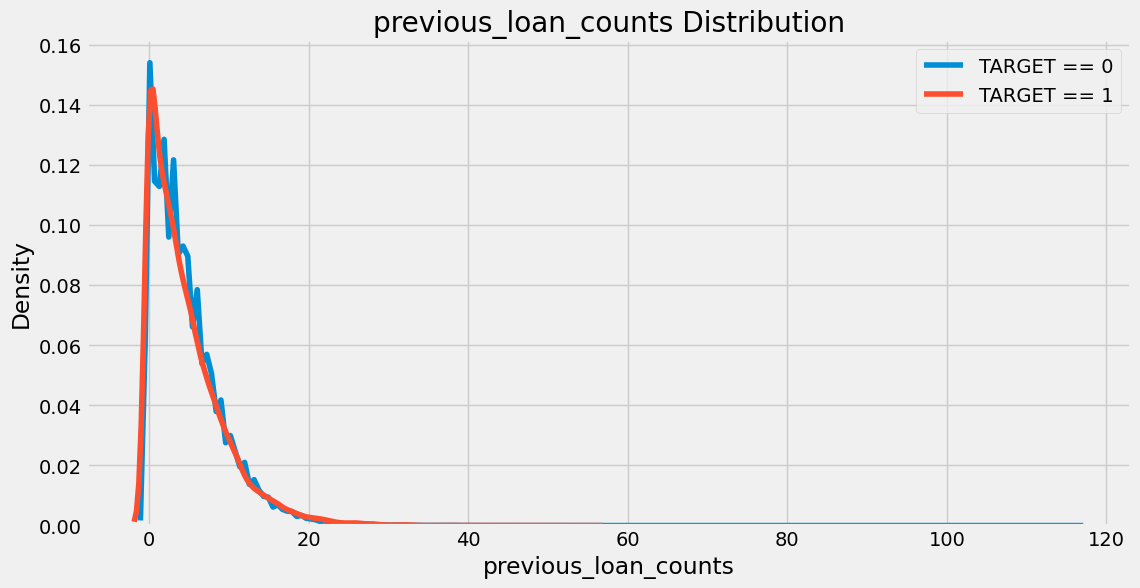

In [46]:

kde_target('previous_loan_counts', app_train)


In [47]:
app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0           24700.5  ...                 0                0                0   
1           35698.5  ...                 0                0                0   
2            6750.0  ...                 0                0                0   
3           29686.5  ...                 0                0                0   
4           21865.5  ...                 0                0                0   
...             ...  ...               ...              ...              ...   
307506      27558.0  ...                 0                0                0   
307507      12001.5  ...                 0                0                0   
307508      29979.0  ...                 0                0                0   
307509      20205.0  ...                 0                0                0   
307510      49117.5  ...                 0                0                0   

       AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                             0.0                       0.0   
1                             0.0                       0.0   
2                             0.0                       0.0   
3                             NaN                       NaN   
4                             0.0                       0.0   
...                           ...                       ...   
307506                        NaN                       NaN   
307507                        NaN                       NaN   
307508                        1.0                       0.0   
307509                        0.0                       0.0   
307510                        0.0                       0.0   

       AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                             0.0                        0.0   
1                             0.0                        0.0   
2                             0.0                        0.0   
3                             NaN                        NaN   
4                             0.0                        0.0   
...                           ...                        ...   
307506                        NaN                        NaN   
307507                        NaN               

In [48]:
print(bureau.dtypes)


SK_ID_CURR                  int64
SK_ID_BUREAU                int64
CREDIT_ACTIVE              object
CREDIT_CURRENCY            object
DAYS_CREDIT                 int64
CREDIT_DAY_OVERDUE          int64
DAYS_CREDIT_ENDDATE       float64
DAYS_ENDDATE_FACT         float64
AMT_CREDIT_MAX_OVERDUE    float64
CNT_CREDIT_PROLONG          int64
AMT_CREDIT_SUM            float64
AMT_CREDIT_SUM_DEBT       float64
AMT_CREDIT_SUM_LIMIT      float64
AMT_CREDIT_SUM_OVERDUE    float64
CREDIT_TYPE                object
DAYS_CREDIT_UPDATE          int64
AMT_ANNUITY               float64
dtype: object


In [49]:
bureau_agg = bureau.drop(columns = ['SK_ID_BUREAU','CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE']).groupby('SK_ID_CURR', as_index = False).agg(['count', 'mean', 'max', 'min', 'sum'])
bureau_agg.head()

SK_ID_CURR DAYS_CREDIT                               CREDIT_DAY_OVERDUE  \
                   count         mean  max   min   sum              count   
0     100001           7  -735.000000  -49 -1572 -5145                  7   
1     100002           8  -874.000000 -103 -1437 -6992                  8   
2     100003           4 -1400.750000 -606 -2586 -5603                  4   
3     100004           2  -867.000000 -408 -1326 -1734                  2   
4     100005           3  -190.666667  -62  -373  -572                  3   

                ... DAYS_CREDIT_UPDATE                               \
  mean max min  ...              count        mean  max   min   sum   
0  0.0   0   0  ...                  7  -93.142857   -6  -155  -652   
1  0.0   0   0  ...                  8 -499.875000   -7 -1185 -3999   
2  0.0   0   0  ...                  4 -816.000000  -43 -2131 -3264   
3  0.0   0   0  ...                  2 -532.000000 -382  -682 -1064   
4  0.0   0   0  ...                  3  -54.333333  -11  -121  -163   

  AMT_ANNUITY                                      
        count         mean      max  min      sum  
0           7  3545.357143  10822.5  0.0  24817.5  
1           7     0.000000      0.0  0.0      0.0  
2           0          NaN      NaN  NaN      0.0  
3           0          NaN      NaN  NaN      0.0  
4           3  1420.500000   4261.5  0.0   4261.5  

[5 rows x 61 columns]

In [50]:
columns = ['SK_ID_CURR']

# Iterate through the variables names
for var in bureau_agg.columns.levels[0]:
    # Skip the id name
    if var != 'SK_ID_CURR':
        
        # Iterate through the stat names
        for stat in bureau_agg.columns.levels[1][:-1]:
            # Make a new column name for the variable and stat
            columns.append('bureau_%s_%s' % (var, stat))

In [51]:
bureau_agg.columns = columns
bureau_agg.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [52]:
app_train = app_train.merge(bureau_agg, on = 'SK_ID_CURR', how = 'left')
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  bureau_DAYS_CREDIT_UPDATE_count bureau_DAYS_CREDIT_UPDATE_mean  \
0  ...                              8.0                       -499.875   
1  ...                              4.0                       -816.000   
2  ...                              2.0                       -532.000   
3  ...                              NaN                            NaN   
4  ...                              1.0                       -783.000   

  bureau_DAYS_CREDIT_UPDATE_max bureau_DAYS_CREDIT_UPDATE_min  \
0                          -7.0                       -1185.0   
1                         -43.0                       -2131.0   
2                        -382.0                        -682.0   
3                           NaN                           NaN   
4                        -783.0                        -783.0   

  bureau_DAYS_CREDIT_UPDATE_sum bureau_AMT_ANNUITY_count  \
0                       -3999.0                      7.0   
1                       -3264.0                      0.0   
2                       -1064.0                      0.0   
3                           NaN                      NaN   
4                        -783.0                      0.0   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0                      0.0                     0.0                     0.0   
1                      NaN                     NaN                     NaN   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4                      NaN                     NaN                     NaN   

   bureau_AMT_ANNUITY_sum  
0                     0.0  
1                     0.0  
2                     0.0  
3                     NaN  
4                     0.0  

[5 rows x 183 columns]

In [53]:
# List of new correlations
new_corrs = []

# Iterate through the columns 
for col in columns:
    # Calculate correlation with the target
    corr = app_train['TARGET'].corr(app_train[col])
    
    # Append the list as a tuple

    new_corrs.append((col, corr))

In [54]:
new_corrs = sorted(new_corrs, key = lambda x: abs(x[1]), reverse = True)
new_corrs[:15]

[('bureau_DAYS_CREDIT_mean', 0.089728967219981),
 ('bureau_DAYS_CREDIT_min', 0.07524825103010374),
 ('bureau_DAYS_CREDIT_UPDATE_mean', 0.06892735266968684),
 ('bureau_DAYS_ENDDATE_FACT_min', 0.055887379843920795),
 ('bureau_DAYS_CREDIT_ENDDATE_sum', 0.053734895601020585),
 ('bureau_DAYS_ENDDATE_FACT_mean', 0.05319962585758622),
 ('bureau_DAYS_CREDIT_max', 0.04978205463997309),
 ('bureau_DAYS_ENDDATE_FACT_sum', 0.048853502611115936),
 ('bureau_DAYS_CREDIT_ENDDATE_mean', 0.04698275433483553),
 ('bureau_DAYS_CREDIT_UPDATE_min', 0.04286392247073023),
 ('bureau_DAYS_CREDIT_sum', 0.04199982481484667),
 ('bureau_DAYS_CREDIT_UPDATE_sum', 0.0414036353530601),
 ('bureau_DAYS_CREDIT_ENDDATE_max', 0.03658963469632898),
 ('bureau_DAYS_CREDIT_ENDDATE_min', 0.034281109921615996),
 ('bureau_DAYS_ENDDATE_FACT_count', -0.03049230665332547)]

The correlation between bureau_DAYS_CREDIT_mean and the TARGET is 0.0897
Median value for loan that was not repaid = -835.3333
Median value for loan that was repaid =     -1067.0000


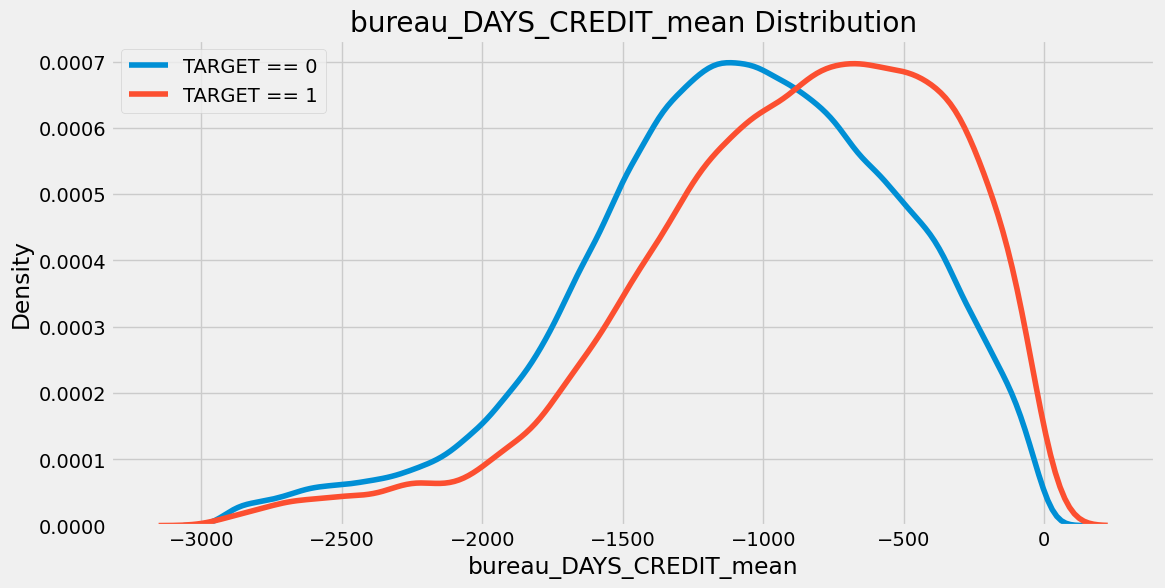

In [55]:
kde_target('bureau_DAYS_CREDIT_mean', app_train)

In [56]:
def agg_numeric(df, group_var, df_name):
    # Remove id variables other than grouping variable
    for col in df:
        if col != group_var and 'SK_ID' in col:
            df = df.drop(columns = col)
            
    group_ids = df[group_var]
    numeric_df = df.select_dtypes('number')
    numeric_df[group_var] = group_ids

    # Group by the specified variable and calculate the statistics
    agg = numeric_df.groupby(group_var).agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

    # Need to create new column names
    columns = [group_var]

    # Iterate through the variables names
    for var in agg.columns.levels[0]:
        # Skip the grouping variable
        if var != group_var:
            # Iterate through the stat names
            for stat in agg.columns.levels[1][:-1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))

    agg.columns = columns
    return agg

In [57]:
#看下效果，一个函数完成了上面所有的步骤
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [58]:
#同样再定义一个相关性计算函数
def target_corrs(df):

    # List of correlations
    corrs = []

    # Iterate through the columns 
    for col in df.columns:
        print(col)
        # Skip the target column
        if col != 'TARGET':
            # Calculate correlation with the target
            corr = df['TARGET'].corr(df[col])

            # Append the list as a tuple
            corrs.append((col, corr))
            
    # Sort by absolute magnitude of correlations
    corrs = sorted(corrs, key = lambda x: abs(x[1]), reverse = True)
    
    return corrs

In [59]:
categorical = pd.get_dummies(bureau.select_dtypes('object'))
categorical['SK_ID_CURR'] = bureau['SK_ID_CURR']
categorical.head()

CREDIT_ACTIVE_Active  CREDIT_ACTIVE_Bad debt  CREDIT_ACTIVE_Closed  \
0                 False                   False                  True   
1                  True                   False                 False   
2                  True                   False                 False   
3                  True                   False                 False   
4                  True                   False                 False   

   CREDIT_ACTIVE_Sold  CREDIT_CURRENCY_currency 1  CREDIT_CURRENCY_currency 2  \
0               False                        True                       False   
1               False                        True                       False   
2               False                        True                       False   
3               False                        True                       False   
4               False                        True                       False   

   CREDIT_CURRENCY_currency 3  CREDIT_CURRENCY_currency 4  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   CREDIT_TYPE_Another type of loan  CREDIT_TYPE_Car loan  ...  \
0                             False                 False  ...   
1                             False                 False  ...   
2                             False                 False  ...   
3                             False                 False  ...   
4                             False                 False  ...   

   CREDIT_TYPE_Loan for business development  \
0                                      False   
1                                      False   
2                                      False   
3                                      False   
4                                      False   

   CREDIT_TYPE_Loan for purchase of shares (margin lending)  \
0                                              False          
1                                              False          
2                                              False          
3                                              False          
4                                              False          

   CREDIT_TYPE_Loan for the purchase of equipment  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   CREDIT_TYPE_Loan for working capital replenishment  CREDIT_TYPE_Microloan  \
0                                              False                   False   
1                                              False                   False   
2                                              False                   False   
3                                              False                   False   
4                                              False                   False   

   CREDIT_TYPE_Mobile operator loan  CREDIT_TYPE_Mortgage  \
0                             False                 False   
1                             False                 False   
2                             False                 False   
3                             False                 False   
4                             False                 False   

   CREDIT_TYPE_Real estate loan  CREDIT_TYPE_Unknown type of loan  SK_ID_CURR  
0                         False                             False      215354  
1                         False                             False      215354  
2                         False                             False      215354  
3                         False                             False      215354  
4                         False                             False      215354 

In [60]:
categorical_grouped = categorical.groupby('SK_ID_CURR').agg(['sum', 'mean'])
categorical_grouped.head()

CREDIT_ACTIVE_Active           CREDIT_ACTIVE_Bad debt       \
                            sum      mean                    sum mean   
SK_ID_CURR                                                              
100001                        3  0.428571                      0  0.0   
100002                        2  0.250000                      0  0.0   
100003                        1  0.250000                      0  0.0   
100004                        0  0.000000                      0  0.0   
100005                        2  0.666667                      0  0.0   

           CREDIT_ACTIVE_Closed           CREDIT_ACTIVE_Sold       \
                            sum      mean                sum mean   
SK_ID_CURR                                                          
100001                        4  0.571429                  0  0.0   
100002                        6  0.750000                  0  0.0   
100003                        3  0.750000                  0  0.0   
100004                        2  1.000000                  0  0.0   
100005                        1  0.333333                  0  0.0   

           CREDIT_CURRENCY_currency 1       ... CREDIT_TYPE_Microloan       \
                                  sum mean  ...                   sum mean   
SK_ID_CURR                                  ...                              
100001                              7  1.0  ...                     0  0.0   
100002                              8  1.0  ...                     0  0.0   
100003                              4  1.0  ...                     0  0.0   
100004                              2  1.0  ...                     0  0.0   
100005                              3  1.0  ...                     0  0.0   

           CREDIT_TYPE_Mobile operator loan      CREDIT_TYPE_Mortgage       \
                                        sum mean                  sum mean   
SK_ID_CURR                                                                   
100001                                    0  0.0                    0  0.0   
100002                                    0  0.0                    0  0.0   
100003                                    0  0.0                    0  0.0   
100004                                    0  0.0                    0  0.0   
100005                                    0  0.0                    0  0.0   

           CREDIT_TYPE_Real estate loan      CREDIT_TYPE_Unknown type of loan  \
                                    sum mean                              sum   
SK_ID_CURR                                                                      
100001                                0  0.0                                0   
100002                                0  0.0                                0   
100003                                0  0.0                                0   
100004                                0  0.0                                0   
100005                                0  0.0                                0   

                 
           mean  
SK_ID_CURR       
100001      0.0  
100002      0.0  
100003      0.0  
100004      0.0  
100005      0.0  

[5 rows x 46 columns]

In [61]:
group_var = 'SK_ID_CURR'

# Need to create new column names
columns = []

# Iterate through the variables names
for var in categorical_grouped.columns.levels[0]:
    # Skip the grouping variable
    if var != group_var:
        # Iterate through the stat names
        for stat in ['count', 'count_norm']:
            # Make a new column name for the variable and stat
            columns.append('%s_%s' % (var, stat))

#  Rename the columns
categorical_grouped.columns = columns

categorical_grouped.head()

CREDIT_ACTIVE_Active_count  CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                                                
100001                               3                         0.428571   
100002                               2                         0.250000   
100003                               1                         0.250000   
100004                               0                         0.000000   
100005                               2                         0.666667   

            CREDIT_ACTIVE_Bad debt_count  CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                                                    
100001                                 0                                0.0   
100002                                 0                                0.0   
100003                                 0                                0.0   
100004                                 0                                0.0   
100005                                 0                                0.0   

            CREDIT_ACTIVE_Closed_count  CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                                                
100001                               4                         0.571429   
100002                               6                         0.750000   
100003                               3                         0.750000   
100004                               2                         1.000000   
100005                               1                         0.333333   

            CREDIT_ACTIVE_Sold_count  CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                                            
100001                             0                            0.0   
100002                             0                            0.0   
100003                             0                            0.0   
100004                             0                            0.0   
100005                             0                            0.0   

            CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                     
100001                                     7   
100002                                     8   
100003                                     4   
100004                                     2   
100005                                     3   

            CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                         ...   
100001                                        1.0  ...   
100002                                        1.0  ...   
100003                                        1.0  ...   
100004                                        1.0  ...   
100005                                        1.0  ...   

            CREDIT_TYPE_Microloan_count  CREDIT_TYPE_Microloan_count_norm  \
SK_ID_CURR                                                                  
100001                                0                               0.0   
100002                                0                               0.0   
100003                                0                               0.0   
100004                                0                               0.0   
100005                                0                               0.0   

            CREDIT_TYPE_Mobile operator loan_count  \
SK_ID_CURR                                           
100001                                           0   
100002                                           0   
100003                                           0   
100004                                           0   
100005                                           0   

            CREDIT_TYPE_Mobile operator loan_count_norm  \
SK_ID_CURR                                                
100001                                              0.0   
100002                                              0.0   
100003   

In [62]:
#做好的特征可以合并到主训练集中
app_train = app_train.merge(categorical_grouped, left_on = 'SK_ID_CURR', right_index = True, how = 'left')
app_train.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  CREDIT_TYPE_Microloan_count CREDIT_TYPE_Microloan_count_norm  \
0  ...                          0.0                              0.0   
1  ...                          0.0                              0.0   
2  ...                          0.0                              0.0   
3  ...                          NaN                              NaN   
4  ...                          0.0                              0.0   

  CREDIT_TYPE_Mobile operator loan_count  \
0                                    0.0   
1                                    0.0   
2                                    0.0   
3                                    NaN   
4                                    0.0   

  CREDIT_TYPE_Mobile operator loan_count_norm CREDIT_TYPE_Mortgage_count  \
0                                         0.0                        0.0   
1                                         0.0                        0.0   
2                                         0.0                        0.0   
3                                         NaN                        NaN   
4                                         0.0                        0.0   

  CREDIT_TYPE_Mortgage_count_norm  CREDIT_TYPE_Real estate loan_count  \
0                             0.0                                 0.0   
1                             0.0                                 0.0   
2                             0.0                                 0.0   
3                             NaN                                 NaN   
4                             0.0                                 0.0   

   CREDIT_TYPE_Real estate loan_count_norm  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      NaN   
4                                      0.0   

   CREDIT_TYPE_Unknown type of loan_count  \
0                                     0.0   
1                                     0.0   
2                                     0.0   
3                                     NaN   
4                                     0.0   

   CREDIT_TYPE_Unknown type of loan_count_norm  
0                                          0.0  
1                                          0.0  
2                                          0.0  
3                                          NaN  
4                                          0.0  

[5 rows x 229 columns]

In [63]:
def count_categorical(df, group_var, df_name):
 
    # Select the categorical columns
    categorical = pd.get_dummies(df.select_dtypes('object'))

    # Make sure to put the identifying id on the column
    categorical[group_var] = df[group_var]

    # Groupby the group var and calculate the sum and mean
    categorical = categorical.groupby(group_var).agg(['sum', 'mean'])
    
    column_names = []
    
    # Iterate through the columns in level 0
    for var in categorical.columns.levels[0]:
        # Iterate through the stats in level 1
        for stat in ['count', 'count_norm']:
            # Make a new column name
            column_names.append('%s_%s_%s' % (df_name, var, stat))
    
    categorical.columns = column_names
    
    return categorical

In [64]:
#来看一下效果，一个函数完成了上面的所有步骤
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_counts.head()

bureau_CREDIT_ACTIVE_Active_count  \
SK_ID_CURR                                      
100001                                      3   
100002                                      2   
100003                                      1   
100004                                      0   
100005                                      2   

            bureau_CREDIT_ACTIVE_Active_count_norm  \
SK_ID_CURR                                           
100001                                    0.428571   
100002                                    0.250000   
100003                                    0.250000   
100004                                    0.000000   
100005                                    0.666667   

            bureau_CREDIT_ACTIVE_Bad debt_count  \
SK_ID_CURR                                        
100001                                        0   
100002                                        0   
100003                                        0   
100004                                        0   
100005                                        0   

            bureau_CREDIT_ACTIVE_Bad debt_count_norm  \
SK_ID_CURR                                             
100001                                           0.0   
100002                                           0.0   
100003                                           0.0   
100004                                           0.0   
100005                                           0.0   

            bureau_CREDIT_ACTIVE_Closed_count  \
SK_ID_CURR                                      
100001                                      4   
100002                                      6   
100003                                      3   
100004                                      2   
100005                                      1   

            bureau_CREDIT_ACTIVE_Closed_count_norm  \
SK_ID_CURR                                           
100001                                    0.571429   
100002                                    0.750000   
100003                                    0.750000   
100004                                    1.000000   
100005                                    0.333333   

            bureau_CREDIT_ACTIVE_Sold_count  \
SK_ID_CURR                                    
100001                                    0   
100002                                    0   
100003                                    0   
100004                                    0   
100005                                    0   

            bureau_CREDIT_ACTIVE_Sold_count_norm  \
SK_ID_CURR                                         
100001                                       0.0   
100002                                       0.0   
100003                                       0.0   
100004                                       0.0   
100005                                       0.0   

            bureau_CREDIT_CURRENCY_currency 1_count  \
SK_ID_CURR                                            
100001                                            7   
100002                                            8   
100003                                            4   
100004                                            2   
100005                                            3   

            bureau_CREDIT_CURRENCY_currency 1_count_norm  ...  \
SK_ID_CURR                                                ...   
100001                                               1.0  ...   
100002                                               1.0  ...   
100003                                               1.0  ...   
100004                                               1.0  ...   
100005                                               1.0  ...   

            bureau_CREDIT_TYPE_Microloan_count  \
SK_ID_CURR                                       
100001                                       0   
100002                                       0   
100003                                       0   
100004                      

In [66]:
app_train=pd.read_csv('application_train.csv')
app_test = pd.read_csv('application_test.csv')
bureau = pd.read_csv('bureau.csv')
previous_application = pd.read_csv('previous_application.csv')


In [67]:
app_train['CREDIT_INCOME_PERCENT'] = app_train['AMT_CREDIT'] / app_train['AMT_INCOME_TOTAL']
app_train['ANNUITY_INCOME_PERCENT'] = app_train['AMT_ANNUITY'] / app_train['AMT_INCOME_TOTAL']
app_train['CREDIT_TERM'] = app_train['AMT_ANNUITY'] / app_train['AMT_CREDIT']
app_train['DAYS_EMPLOYED_PERCENT'] = app_train['DAYS_EMPLOYED'] / app_train['DAYS_BIRTH']
app_train['INCOME_PER_CHILD'] = app_train['AMT_INCOME_TOTAL'] / app_train['CNT_CHILDREN']
app_train['HAS_HOUSE_INFORMATION'] = app_train['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)


app_test['CREDIT_INCOME_PERCENT'] = app_test['AMT_CREDIT'] / app_test['AMT_INCOME_TOTAL']
app_test['ANNUITY_INCOME_PERCENT'] = app_test['AMT_ANNUITY'] / app_test['AMT_INCOME_TOTAL']
app_test['CREDIT_TERM'] = app_test['AMT_ANNUITY'] / app_test['AMT_CREDIT']
app_test['DAYS_EMPLOYED_PERCENT'] = app_test['DAYS_EMPLOYED'] / app_test['DAYS_BIRTH']
app_test['INCOME_PER_CHILD'] = app_test['AMT_INCOME_TOTAL'] / app_test['CNT_CHILDREN']
app_test['HAS_HOUSE_INFORMATION'] = app_test['COMMONAREA_MEDI'].apply(lambda x:1 if x>0 else 0)



In [68]:
bureau_counts = count_categorical(bureau, group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new = agg_numeric(bureau.drop(columns = ['SK_ID_BUREAU']), group_var = 'SK_ID_CURR', df_name = 'bureau')
bureau_agg_new.head()

SK_ID_CURR  bureau_DAYS_CREDIT_count  bureau_DAYS_CREDIT_mean  \
0      100001                         7              -735.000000   
1      100002                         8              -874.000000   
2      100003                         4             -1400.750000   
3      100004                         2              -867.000000   
4      100005                         3              -190.666667   

   bureau_DAYS_CREDIT_max  bureau_DAYS_CREDIT_min  bureau_DAYS_CREDIT_sum  \
0                     -49                   -1572                   -5145   
1                    -103                   -1437                   -6992   
2                    -606                   -2586                   -5603   
3                    -408                   -1326                   -1734   
4                     -62                    -373                    -572   

   bureau_CREDIT_DAY_OVERDUE_count  bureau_CREDIT_DAY_OVERDUE_mean  \
0                                7                             0.0   
1                                8                             0.0   
2                                4                             0.0   
3                                2                             0.0   
4                                3                             0.0   

   bureau_CREDIT_DAY_OVERDUE_max  bureau_CREDIT_DAY_OVERDUE_min  ...  \
0                              0                              0  ...   
1                              0                              0  ...   
2                              0                              0  ...   
3                              0                              0  ...   
4                              0                              0  ...   

   bureau_DAYS_CREDIT_UPDATE_count  bureau_DAYS_CREDIT_UPDATE_mean  \
0                                7                      -93.142857   
1                                8                     -499.875000   
2                                4                     -816.000000   
3                                2                     -532.000000   
4                                3                      -54.333333   

   bureau_DAYS_CREDIT_UPDATE_max  bureau_DAYS_CREDIT_UPDATE_min  \
0                             -6                           -155   
1                             -7                          -1185   
2                            -43                          -2131   
3                           -382                           -682   
4                            -11                           -121   

   bureau_DAYS_CREDIT_UPDATE_sum  bureau_AMT_ANNUITY_count  \
0                           -652                         7   
1                          -3999                         7   
2                          -3264                         0   
3                          -1064                         0   
4                           -163                         3   

   bureau_AMT_ANNUITY_mean  bureau_AMT_ANNUITY_max  bureau_AMT_ANNUITY_min  \
0              3545.357143                 10822.5                     0.0   
1                 0.000000                     0.0                     0.0   
2                      NaN                     NaN                     NaN   
3                      NaN                     NaN                     NaN   
4              1420.500000                  4261.5                     0.0   

   bureau_AMT_ANNUITY_sum  
0                 24817.5  
1                     0.0  
2                     0.0  
3                     0.0  
4                  4261.5  

[5 rows x 61 columns]

In [69]:
app_train = app_train.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(bureau_agg_new, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(bureau_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(bureau_agg_new, on = 'SK_ID_CURR', how = 'left')



In [70]:
previous_appication_counts = count_categorical(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')
previous_appication_agg_new = agg_numeric(previous_application, group_var = 'SK_ID_CURR', df_name = 'previous_application')
previous_appication_agg_new.head()

SK_ID_CURR  previous_application_AMT_ANNUITY_count  \
0      100001                                       1   
1      100002                                       1   
2      100003                                       3   
3      100004                                       1   
4      100005                                       1   

   previous_application_AMT_ANNUITY_mean  \
0                               3951.000   
1                               9251.775   
2                              56553.990   
3                               5357.250   
4                               4813.200   

   previous_application_AMT_ANNUITY_max  previous_application_AMT_ANNUITY_min  \
0                              3951.000                              3951.000   
1                              9251.775                              9251.775   
2                             98356.995                              6737.310   
3                              5357.250                              5357.250   
4                              4813.200                              4813.200   

   previous_application_AMT_ANNUITY_sum  \
0                              3951.000   
1                              9251.775   
2                            169661.970   
3                              5357.250   
4                              4813.200   

   previous_application_AMT_APPLICATION_count  \
0                                           1   
1                                           1   
2                                           3   
3                                           1   
4                                           2   

   previous_application_AMT_APPLICATION_mean  \
0                                   24835.50   
1                                  179055.00   
2                                  435436.50   
3                                   24282.00   
4                                   22308.75   

   previous_application_AMT_APPLICATION_max  \
0                                   24835.5   
1                                  179055.0   
2                                  900000.0   
3                                   24282.0   
4                                   44617.5   

   previous_application_AMT_APPLICATION_min  ...  \
0                                   24835.5  ...   
1                                  179055.0  ...   
2                                   68809.5  ...   
3                                   24282.0  ...   
4                                       0.0  ...   

   previous_application_DAYS_TERMINATION_count  \
0                                            1   
1                                            1   
2                                            3   
3                                            1   
4                                            1   

   previous_application_DAYS_TERMINATION_mean  \
0                                -1612.000000   
1                                  -17.000000   
2                                -1047.333333   
3                                 -714.000000   
4                                 -460.000000   

   previous_application_DAYS_TERMINATION_max  \
0                                    -1612.0   
1                                      -17.0   
2                                     -527.0   
3                                     -714.0   
4                                     -460.0   

   previous_application_DAYS_TERMINATION_min  \
0                                    -1612.0   
1                                      -17.0   
2                                    -1976.0   
3                                     -714.0   
4                                     -460.0   

   previous_application_DAYS_TERMINATION_sum  \
0                                    -1612.0   
1                                      -17.0   
2                                    -3142.0   
3                                     -714.0   
4                                     -460.0   

   pre

In [71]:
app_train = app_train.merge(previous_appication_counts, on = 'SK_ID_CURR', how = 'left')
app_train = app_train.merge(previous_appication_agg_new, on = 'SK_ID_CURR', how = 'left')

app_test = app_test.merge(previous_appication_counts, on = 'SK_ID_CURR', how = 'left')
app_test = app_test.merge(previous_appication_agg_new, on = 'SK_ID_CURR', how = 'left')


In [72]:
print(app_train.shape)
print(app_test.shape)


(307511, 615)
(48744, 614)


In [73]:
# Filter numeric columns
numeric_cols = app_train.select_dtypes(include=[np.number]).columns

# Calculate the correlation matrix for numeric columns
corrs = app_train[numeric_cols].corr()

# Set the threshold
threshold = 0.8

# Empty dictionary to hold correlated variables
above_threshold_vars = {}

# For each column, record the variables that are above the threshold
for col in corrs.columns:
    above_threshold_vars[col] = list(corrs.index[corrs[col] > threshold])

In [74]:
app_train

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  ...  previous_application_DAYS_TERMINATION_count  \
0           24700.5  ...                                          1.0   
1           35698.5  ...                                          3.0   
2            6750.0  ...                                          1.0   
3           29686.5  ...                                          4.0   
4           21865.5  ...                                          5.0   
...             ...  ...                                          ...   
307506      27558.0  ...                                          1.0   
307507      12001.5  ...                                          1.0   
307508      29979.0  ...                                          2.0   
307509      20205.0  ...                                          2.0   
307510      49117.5  ...                                          6.0   

       previous_application_DAYS_TERMINATION_mean  \
0                                      -17.000000   
1                                    -1047.333333   
2                                     -714.000000   
3                                   182481.750000   
4                                    72143.800000   
...                                           ...   
307506                                 -25.000000   
307507                               -2311.000000   
307508                               -2212.500000   
307509                              365243.000000   
307510                                -349.000000   

       previous_application_DAYS_TERMINATION_max  \
0                                          -17.0   
1                                         -527.0   
2                                         -714.0   
3                                       365243.0   
4                                       365243.0   
...                                          ...   
307506                                     -25.0   
307507                                   -2311.0   
307508                                   -1712.0   
307509                                  365243.0   
307510                                     -64.0   

       previous_application_DAYS_TERMINATION_min  \
0                                          -17.0   
1                                  

In [75]:
# Track columns to remove and columns already examined
cols_to_remove = []
cols_seen = []
cols_to_remove_pair = []

# Iterate through columns and correlated columns
for key, value in above_threshold_vars.items():
    # Keep track of columns already examined
    cols_seen.append(key)
    for x in value:
        if x == key:
            next
        else:
            # Only want to remove one in a pair
            if x not in cols_seen:
                cols_to_remove.append(x)
                cols_to_remove_pair.append(key)
            
cols_to_remove = list(set(cols_to_remove))
print('Number of columns to remove: ', len(cols_to_remove))

Number of columns to remove:  189


In [76]:
#训练集和测试集都移除对应的列,我们把列数降低到426
train_corrs_removed = app_train.drop(columns = cols_to_remove)
test_corrs_removed = app_test.drop(columns = cols_to_remove)


print('Training Corrs Removed Shape: ', train_corrs_removed.shape)
print('Testing Corrs Removed Shape: ', test_corrs_removed.shape)

Training Corrs Removed Shape:  (307511, 426)
Testing Corrs Removed Shape:  (48744, 425)


In [77]:
app_test 

SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0          100001         Cash loans           F            N               Y   
1          100005         Cash loans           M            N               Y   
2          100013         Cash loans           M            Y               Y   
3          100028         Cash loans           F            N               Y   
4          100038         Cash loans           M            Y               N   
...           ...                ...         ...          ...             ...   
48739      456221         Cash loans           F            N               Y   
48740      456222         Cash loans           F            N               N   
48741      456223         Cash loans           F            Y               Y   
48742      456224         Cash loans           M            N               N   
48743      456250         Cash loans           F            Y               N   

       CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                 0          135000.0    568800.0      20560.5   
1                 0           99000.0    222768.0      17370.0   
2                 0          202500.0    663264.0      69777.0   
3                 2          315000.0   1575000.0      49018.5   
4                 1          180000.0    625500.0      32067.0   
...             ...               ...         ...          ...   
48739             0          121500.0    412560.0      17473.5   
48740             2          157500.0    622413.0      31909.5   
48741             1          202500.0    315000.0      33205.5   
48742             0          225000.0    450000.0      25128.0   
48743             0          135000.0    312768.0      24709.5   

       AMT_GOODS_PRICE  ... previous_application_DAYS_TERMINATION_count  \
0             450000.0  ...                                         1.0   
1             180000.0  ...                                         1.0   
2             630000.0  ...                                         3.0   
3            1575000.0  ...                                         3.0   
4             625500.0  ...                                         1.0   
...                ...  ...                                         ...   
48739         270000.0  ...                                         1.0   
48740         495000.0  ...                                         4.0   
48741         315000.0  ...                                         2.0   
48742         450000.0  ...                                         2.0   
48743         270000.0  ...                                         4.0   

      previous_application_DAYS_TERMINATION_mean  \
0                                   -1612.000000   
1                                    -460.000000   
2                                    -710.333333   
3                                  121182.666667   
4                                    -449.000000   
...                                          ...   
48739                                -591.000000   
48740                               -1019.500000   
48741                              182307.500000   
48742                              181622.500000   
48743                              182307.000000   

      previous_application_DAYS_TERMINATION_max  \
0                                       -1612.0   
1                                        -460.0   
2                                         -85.0   
3                                      365243.0   
4                                        -449.0   
...                                         ...   
48739                                    -591.0   
48740                                     -43.0   
48741                                  365243.0   
48742                                  365243.0   
48743                                  365243.0   

      previous_application_DAYS_TERMINATION_min  \
0                                       -1612.0   


In [112]:
def model(app_train_domain, test_features, encoding='ohe'):
    # Replace infinite values with NaN and then handle them
    app_train_domain.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    # Separating features and target
    X = app_train_domain.drop(columns=['SK_ID_CURR', 'TARGET'])
    y = app_train_domain['TARGET']
    
    # Splitting the dataset into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Identify categorical and numeric features
    categorical_features = X.select_dtypes(include=['object']).columns
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    
    # Preprocessing Pipeline for categorical features
    categorical_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(handle_unknown='ignore'))])
    
    # Preprocessing Pipeline for numeric features (imputation and scaling)
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    
    # Combine preprocessors
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, numeric_features),
            ('cat', categorical_transformer, categorical_features)])
    
    # Apply preprocessing to the data
    X_train = preprocessor.fit_transform(X_train)
    X_val = preprocessor.transform(X_val)
    
    # Convert the processed data back to DataFrame with appropriate column names
    ohe_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
    feature_names = numeric_features.tolist() + ohe_feature_names.tolist()
    X_train = pd.DataFrame(X_train, columns=feature_names)
    X_val = pd.DataFrame(X_val, columns=feature_names)

    print('Training Data Shape: ', X_train.shape)
    print('Validation Data Shape: ', X_val.shape)

    # Define the model with parameters
    clf_best = TabNetClassifier(
        n_d=8,
        n_a=16,
        n_steps=3,
        gamma=2.0,
        lambda_sparse=0.01
    )

    # Train the model with early stopping
    clf_best.fit(
        X_train=X_train.values, y_train=y_train.values,
        eval_set=[(X_train.values, y_train.values), (X_val.values, y_val.values)],
        eval_name=['train', 'valid'],
        eval_metric=['auc'],
        max_epochs=20,
        patience=5,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    
    # Make predictions
    y_pred_train_prob = clf_best.predict_proba(X_train.values)[:, 1]
    y_pred_prob = clf_best.predict_proba(X_val.values)[:, 1]
    
    # Calculate AUC
    train_auc = roc_auc_score(y_train, y_pred_train_prob)
    val_auc = roc_auc_score(y_val, y_pred_prob)
    print(f'Train AUC: {train_auc:.4f}')
    print(f'Validation AUC: {val_auc:.4f}')

    # Get feature importances
    feature_importances = pd.DataFrame({
        'feature': feature_names,
        'importance': clf_best.feature_importances_
    }).sort_values(by='importance', ascending=False)
    
    return clf_best, feature_importances, train_auc, val_auc, X_train, y_train, X_val, y_val



Training Data Shape:  (246008, 554)
Validation Data Shape:  (61503, 554)


/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/abstract_model.py:82: UserWarning:

Device used : cpu



epoch 0  | loss: 0.31679 | train_auc: 0.54505 | valid_auc: 0.53709 |  0:00:42s
epoch 1  | loss: 0.27998 | train_auc: 0.6385  | valid_auc: 0.63964 |  0:01:22s
epoch 2  | loss: 0.26815 | train_auc: 0.71899 | valid_auc: 0.71728 |  0:02:02s
epoch 3  | loss: 0.25724 | train_auc: 0.74287 | valid_auc: 0.73711 |  0:02:45s
epoch 4  | loss: 0.25432 | train_auc: 0.7443  | valid_auc: 0.73752 |  0:03:27s
epoch 5  | loss: 0.25214 | train_auc: 0.75582 | valid_auc: 0.74793 |  0:04:09s
epoch 6  | loss: 0.24995 | train_auc: 0.76155 | valid_auc: 0.75291 |  0:04:50s
epoch 7  | loss: 0.24859 | train_auc: 0.76206 | valid_auc: 0.75116 |  0:05:29s
epoch 8  | loss: 0.24778 | train_auc: 0.76617 | valid_auc: 0.7543  |  0:06:09s
epoch 9  | loss: 0.24706 | train_auc: 0.76807 | valid_auc: 0.75335 |  0:06:50s
epoch 10 | loss: 0.24571 | train_auc: 0.7682  | valid_auc: 0.74932 |  0:07:34s
epoch 11 | loss: 0.24486 | train_auc: 0.77596 | valid_auc: 0.7564  |  0:08:14s
epoch 12 | loss: 0.24399 | train_auc: 0.77986 | vali

/Users/katherine/Desktop/anaconda3/envs/py11/lib/python3.11/site-packages/pytorch_tabnet/callbacks.py:172: UserWarning:

Best weights from best epoch are automatically used!



Train AUC: 0.7865
Validation AUC: 0.7587


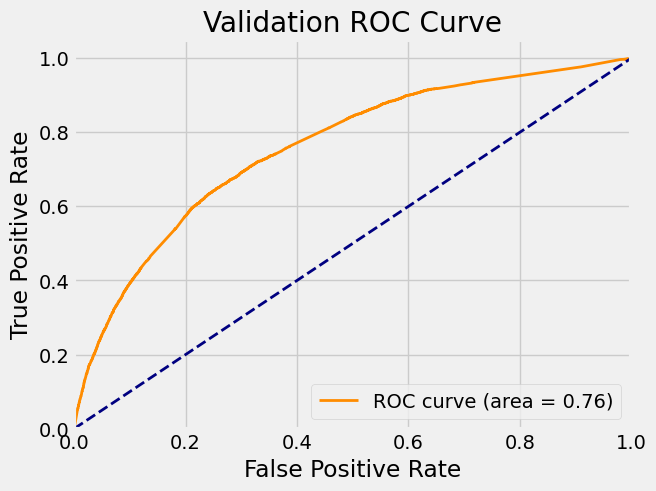

                                               feature  importance
84                   bureau_CREDIT_TYPE_Car loan_count    0.556410
481           ORGANIZATION_TYPE_Business Entity Type 3    0.226905
104     bureau_CREDIT_TYPE_Real estate loan_count_norm    0.119361
160  previous_application_WEEKDAY_APPR_PROCESS_STAR...    0.051764
147  previous_application_NAME_CONTRACT_TYPE_XNA_count    0.011994
..                                                 ...         ...
206  previous_application_NAME_CASH_LOAN_PURPOSE_Ur...    0.000000
205  previous_application_NAME_CASH_LOAN_PURPOSE_Ur...    0.000000
204  previous_application_NAME_CASH_LOAN_PURPOSE_Re...    0.000000
203  previous_application_NAME_CASH_LOAN_PURPOSE_Re...    0.000000
277  previous_application_NAME_GOODS_CATEGORY_Furni...    0.000000

[554 rows x 2 columns]


In [113]:
clf_best, feature_importances, train_auc, val_auc, X_train, y_train, X_val, y_val = model(train_corrs_removed, test_corrs_removed)
plot_roc_curve(clf_best, X_val, y_val, title='Validation ROC Curve')
print(feature_importances)